# Housing_Price_Prediction_Project

### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
    
• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?


### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

### Technical Requirements:

• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.

### Import Necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [3]:
# import train data and check 6 different samples

train = pd.read_csv('C:\\Users\\91741\\Downloads\\train.csv')
train.sample(n=6)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
186  1090         120       FV         37.0     3316   Pave  Pave      IR1   
687   683         120       RL          NaN     2887   Pave   NaN      Reg   
349   373         120       RL         50.0     7175   Pave   NaN      Reg   
343   444         120       RL         53.0     3922   Pave   NaN      Reg   
948   169          60       RL         62.0     8244   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
3           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
186         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
687         HLS    AllPub  ...        0    NaN    NaN         NaN       0   
349         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
343         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
948         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
3        1   2010       COD         Normal     190000  
186      4   2006        WD         Normal     197000  
687     11   2008        WD         Normal     173000  
349      2   2010        WD         Normal     125000  
343      6   2007       New        Partial     172500  
948      5   2007        WD         Normal     183500  

[6 rows x 81 columns]

In [4]:
# import test data and check 6 different samples

test = pd.read_csv('C:\\Users\\91741\\Downloads\\test.csv')
test.sample(n=6)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
105   635          90       RL         64.0     6979   Pave   NaN      Reg   
88   1072          60       RL         78.0    11700   Pave   NaN      Reg   
56    443          50       RM         52.0     6240   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
186   219          50       RL          NaN    15660   Pave   NaN      IR1   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
105         Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
88          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
56          Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
25          Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
186         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
28          Lvl    AllPub  ...         119        0    NaN    NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
105     600      6    2010        WD         Normal  
88        0      5    2009        WD         Normal  
56        0      6    2008        WD         Normal  
25        0     10    2008        WD         Normal  
186       0      5    2008        WD         Normal  
28        0      5    2006        WD         Normal  

[6 rows x 80 columns]

### Checking Shape:

In [5]:
# checking shapes of train and test data

print ("No of rows of train dataset:",train.shape[0])
print ("No of Columns of train dataset:",train.shape[1])

print ("No of rows of test dataset:",test.shape[0])
print ("No of Columns of test dataset:",test.shape[1])

No of rows of train dataset: 1168
No of Columns of train dataset: 81
No of rows of test dataset: 292
No of Columns of test dataset: 80


Observations:
    
This train Dataset has 1168 rows and 81 columns. This test Dataset has 292 rows and 80 columns.

Let's study the column's names and their charectaristics.

### Preprocessing of train data:

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Observations:
   
There are total 43 categorical columns among 81 columns.

### Checking Null:

In [8]:
null_val= train.isna().sum().any()
null_val

True

In [9]:
pd.set_option('display.max_rows',None) 
null_val= train.isna().sum().sort_values(ascending = False)
null_val_per =(null_val/train.shape[0])*100
l= [null_val, null_val_per]
ll= pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values')

print("missing value details \n\n", ll)

missing value details 

                Null Values  Null Values percentage
MoSold                   0                0.000000
LandContour              0                0.000000
Utilities                0                0.000000
YearBuilt                0                0.000000
LotConfig                0                0.000000
Neighborhood             0                0.000000
Condition1               0                0.000000
Condition2               0                0.000000
LotShape                 0                0.000000
BldgType                 0                0.000000
OverallQual              0                0.000000
LandSlope                0                0.000000
2ndFlrSF                 0                0.000000
HeatingQC                0                0.000000
GrLivArea                0                0.000000
SaleCondition            0                0.000000
SaleType                 0                0.000000
HouseStyle               0                0.000000
Street

<AxesSubplot:>

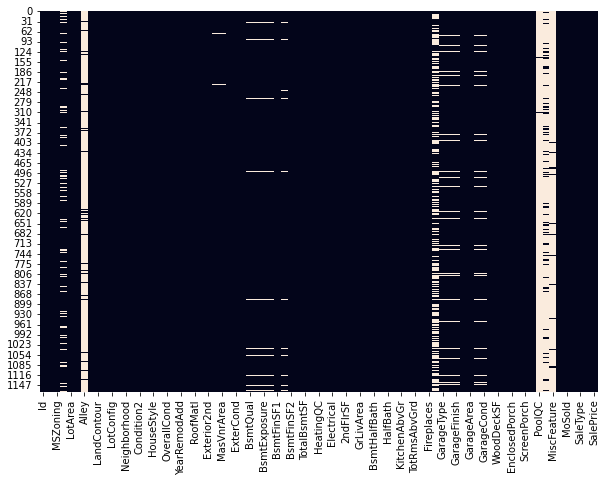

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(),cbar=False)

Observations:
    
Null values are present in the total dataset.

## Checking duplicate:

In [11]:
#checking duplicate

train.duplicated().sum()

0

Oservations:
    
No duplicate values are present.

Let's impute the missing values.

### Statistical Matrix Evaluation:

In [12]:
train.describe().T    

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

Observations:
    
1.Null is present.

2.Seems outliers are present as there is a difference between 75% and max of some features.

3.As there is some discrete numarical value, so for some feature, min is 0.

4.YearBuilt, YearRemodAdd, GarageYrBlt and YrSold are all year value. Later convert it in corrospinding age.

5.Here sale price is the Target Variable and it is a int64 datatype. So the problem is a Rregression problem.

In [13]:
train.describe(include=object)

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1168   1168    77     1168        1168      1168      1168   
unique        5      2     2        4           4         1         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        928   1164    41      740        1046      1168       842   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1168         1168       1168  ...       1104         1104   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1105          182       1005  ...        691          487   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1104       1104       1168      7    237          44     1168   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1050       1061       1071      3    129          40      999   

       SaleCondition  
count           1168  
unique             6  
top           Normal  
freq             945  

[4 rows x 43 columns]

### Imputing missing values:

In [14]:
print (train['FireplaceQu'].isna().sum()/train.shape[0])
print (train['Fence'].isna().sum()/train.shape[0])
print (train['Alley'].isna().sum()/train.shape[0])
print (train['MiscFeature'].isna().sum()/train.shape[0])
print (train['PoolQC'].isna().sum()/train.shape[0])

0.4717465753424658
0.7970890410958904
0.9340753424657534
0.9623287671232876
0.9940068493150684


observations:
    
FireplaceQu have arrount 50% missing data and rest of others have above 80% missing data. Let's drop those columns

In [15]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [16]:
null_val= train.isna().sum()
null_val_per =(null_val/train.shape[0])*100
l= [null_val, null_val_per]
ll= pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values')

print("missing value details \n\n", ll)

missing value details 

                Null Values  Null Values percentage
Id                       0                0.000000
BedroomAbvGr             0                0.000000
HalfBath                 0                0.000000
FullBath                 0                0.000000
BsmtHalfBath             0                0.000000
BsmtFullBath             0                0.000000
GrLivArea                0                0.000000
KitchenAbvGr             0                0.000000
LowQualFinSF             0                0.000000
1stFlrSF                 0                0.000000
Electrical               0                0.000000
CentralAir               0                0.000000
HeatingQC                0                0.000000
Heating                  0                0.000000
SaleCondition            0                0.000000
2ndFlrSF                 0                0.000000
BsmtUnfSF                0                0.000000
KitchenQual              0                0.000000
Functi

### LotFrontage imputation:
    
LotFrontage means Linear feet of street connected to property

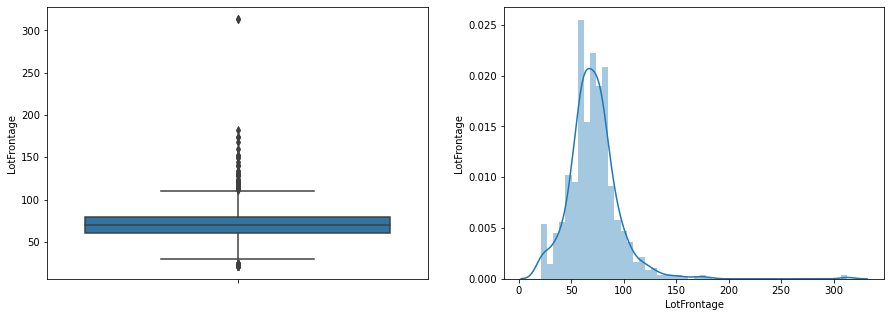

In [17]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'LotFrontage', data= train,ax=ax[0])
plt.ylabel('LotFrontage')
sns.distplot(train['LotFrontage'] ,ax=ax[1])
plt.xlabel('LotFrontage')
plt.show()

Outliers are present in the column frontage. So let's impute with median()

In [18]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['LotFrontage'].isnull().sum()

0

### GarageType imputation:

In [19]:
train["GarageType"].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [20]:
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageType'].isnull().sum()

0

### Observations:
    
As GarageType is a categorical data , imoute this with mode()

### GarageYrBlt impute:
    
GarageYrBlt: Year garage was built

In [21]:
train["GarageYrBlt"].nunique()

97

In [22]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
train['GarageYrBlt'].isnull().sum()

0

### Observations:
As GarageType is a categorical data , imoute this with mode()

### GarageFinish imputation:

In [23]:
train['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [24]:
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageFinish'].isnull().sum()

0

### Observations:
As GarageFinish is a categorical data , imoute this with mode()

### GarageCond imputation:

In [25]:
train['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [26]:
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['GarageCond'].isnull().sum()

0

### Observations:
As GarageCond is a categorical data , imoute this with mode()

### GarageQual imputation:

In [27]:
train['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

In [28]:
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageQual'].isnull().sum()

0

### Observations:
As GarageQual is a categorical data , imoute this with mode()

### BsmtFinType2 imputation:

In [29]:
train['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [30]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtFinType2'].isnull().sum()

0

### Observations:
As BsmtFinType2 is a categorical data , impute this with mode()

### BsmtExposure imputation:

In [31]:
train['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [32]:
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtExposure'].isnull().sum()

0

### Observations:
As BsmtExposure is a categorical data , impute this with mode()

### BsmtFinType1 imputation:

In [33]:
train['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [34]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType1'].isnull().sum()

0

### Observations:
As BsmtFinType1 is a categorical data , impute this with mode()

### BsmtCond imputation:

In [35]:
train['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [36]:
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtCond'].isnull().sum()

0

### Observations:
As BsmtCond is a categorical data , impute this with mode()

### BsmtQual imputation:

In [37]:
train['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [38]:
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtQual'].isnull().sum()

0

### Observations:
As BsmtCond is a categorical data , impute this with mode()

### MasVnrType imputation:

In [39]:
train['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [40]:
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrType'].isnull().sum()

0

### Observations:
As MasVnrType is a categorical data , impute this with mode()

### MasVnrArea imputation:
MasVnrArea means Masonry veneer area in square feet.

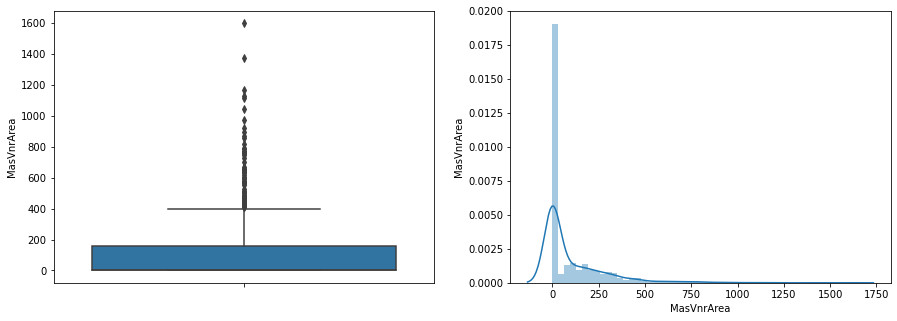

In [41]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'MasVnrArea', data= train,ax=ax[0])
plt.ylabel('MasVnrArea')
sns.distplot(train['MasVnrArea'] ,ax=ax[1])
plt.xlabel('MasVnrArea')
plt.show()

In [42]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())
train['MasVnrArea'].isnull().sum()

0

### Observations:
Outliers are present in the column MasVnrArea. So let's impute with median()

## Missing Value Check after imputation:

In [43]:
null_val= train.isna().sum().any()
null_val

False

### observations:
No Missing value present in training Dataset. Let's move forward

## Data cleaning:

In [44]:
pd.set_option('display.max_rows',None) 
train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

In [45]:
train["Street"].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [46]:
train["CentralAir"].value_counts()

Y    1090
N      78
Name: CentralAir, dtype: int64

In [47]:
train["Utilities"].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

### Observations:
    
1.Utilities has one unique value for each different entries. There is no effect for changing entries. Let's drop this.

2.Id has 1168 unique value for each different entries. Let's drop this also.

3.Street has Pave for 1164 and only 4 data against Grvl. Let's drop it also.

In [48]:
train.drop(["Utilities","Id", "Street"],axis=1,inplace=True)

In this total dataset YearBuilt, YearRemodAdd, YrSold and GarageYrBlt have all year data. Let's convert into corrosponding age that is subtract the corrosponding value from the maximum of that column.

In [49]:
train['YearBuilt_age'] = train['YearBuilt'].max() - train['YearBuilt']
train['YearRemodAdd_age'] = train['YearRemodAdd'].max() - train['YearRemodAdd']
train['YrSold_age'] = train['YrSold'].max() - train['YrSold']
train['GarageYrBlt_age'] = train['GarageYrBlt'].max() - train['GarageYrBlt']

# dropping old columns 

train.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

### Observations:
The traning data set is cleaned. let's move into EDA phase.

## Exploratory Data Analysis:

In [50]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1168 non-null   int64  
 1   MSZoning          1168 non-null   object 
 2   LotFrontage       1168 non-null   float64
 3   LotArea           1168 non-null   int64  
 4   LotShape          1168 non-null   object 
 5   LandContour       1168 non-null   object 
 6   LotConfig         1168 non-null   object 
 7   LandSlope         1168 non-null   object 
 8   Neighborhood      1168 non-null   object 
 9   Condition1        1168 non-null   object 
 10  Condition2        1168 non-null   object 
 11  BldgType          1168 non-null   object 
 12  HouseStyle        1168 non-null   object 
 13  OverallQual       1168 non-null   int64  
 14  OverallCond       1168 non-null   int64  
 15  RoofStyle         1168 non-null   object 
 16  RoofMatl          1168 non-null   object 


### For MSSubClass:

In [52]:
train["MSSubClass"].value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

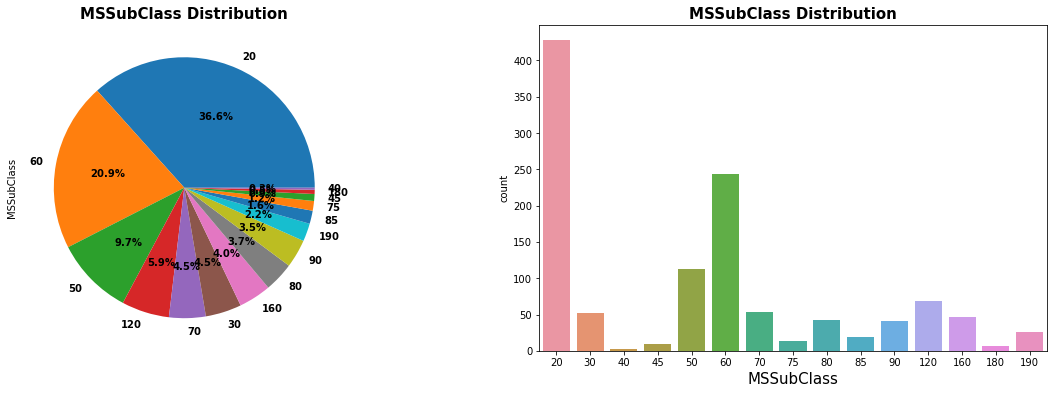

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['MSSubClass'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('MSSubClass Distribution', fontsize=15,fontweight ='bold')
sns.countplot('MSSubClass',data=train,ax=ax[1])
ax[1].set_title('MSSubClass Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('MSSubClass',fontsize=15)
plt.show()

## Observations:

MSSubClass: Identifies the type of dwelling involved in the sale.

    20	1-STORY 1946 & NEWER ALL STYLES
    30	1-STORY 1945 & OLDER
    40	1-STORY W/FINISHED ATTIC ALL AGES
    45	1-1/2 STORY - UNFINISHED ALL AGES
    50	1-1/2 STORY FINISHED ALL AGES
    60	2-STORY 1946 & NEWER
    70	2-STORY 1945 & OLDER
    75	2-1/2 STORY ALL AGES
    80	SPLIT OR MULTI-LEVEL
    85	SPLIT FOYER
    90	DUPLEX - ALL STYLES AND AGES
   120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
   150	1-1/2 STORY PUD - ALL AGES
   160	2-STORY PUD - 1946 & NEWER
   180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
   190	2 FAMILY CONVERSION - ALL STYLES AND AGES

36.6% of house are 1-STORY 1946 & NEWER ALL STYLES followed by 20.9 % of house are 2-STORY 1946 & NEWER.
1-STORY W/FINISHED ATTIC ALL AGES is very percentage

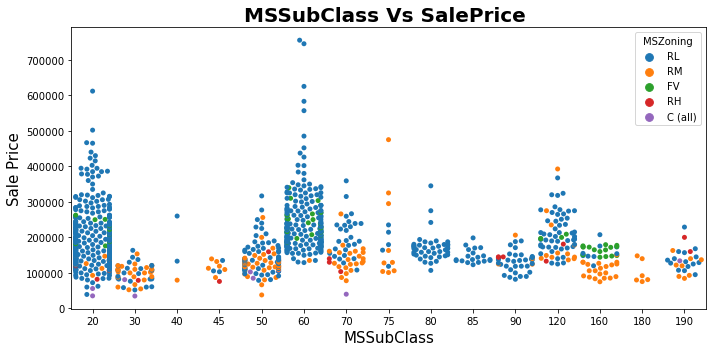

In [54]:
plt.figure(figsize=(10,5))
sns.swarmplot(x=train['MSSubClass'], y=train['SalePrice'], hue=train["MSZoning"])
plt.title("MSSubClass Vs SalePrice ",fontsize=20,fontweight ='bold')
plt.xlabel('MSSubClass',fontsize = 15)
plt.ylabel('Sale Price',fontsize = 15)
plt.tight_layout()
plt.show()

### Observations:
For MSSubClass class 20 and 60, SalePrice is high and maximum MSZoning is Residential Low Density

## For MSZoning:

In [55]:
train["MSZoning"].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

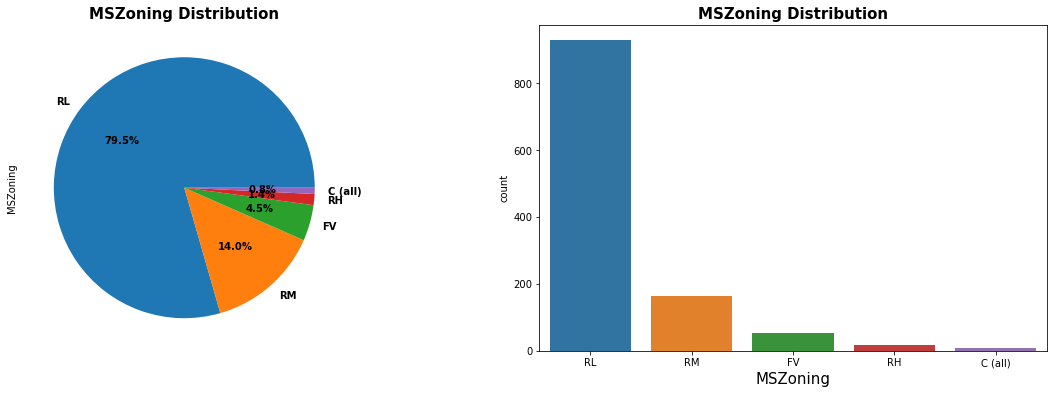

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['MSZoning'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('MSZoning Distribution', fontsize=15,fontweight ='bold')
sns.countplot('MSZoning',data=train,ax=ax[1])
ax[1].set_title('MSZoning Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('MSZoning',fontsize=15)
plt.show()

### Observations:
MSZoning: Identifies the general zoning classification of the sale. A Agriculture C Commercial FV Floating Village Residential I Industrial RH Residential High Density RL Residential Low Density RP Residential Low Density Park RM Residential Medium Density

1.79.5% of house are in Residential Low Density followed by 14 % of house are in Residential Medium Density area.

2.Floating Village Residential is only 4.5%

3.Very few house (0.8%) are in Commerical zone.

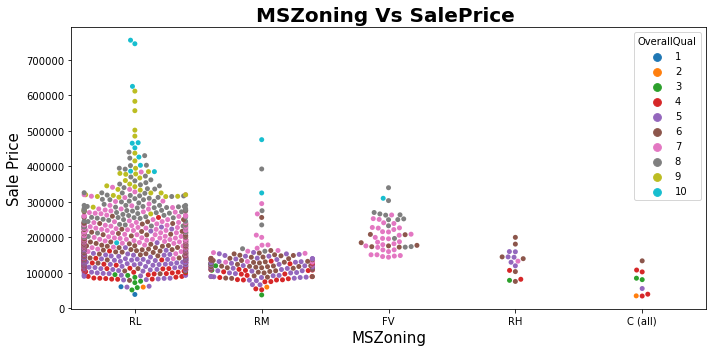

In [57]:
plt.figure(figsize=(10,5))
sns.swarmplot(x=train['MSZoning'], y=train['SalePrice'], hue= train["OverallQual"])
plt.title("MSZoning Vs SalePrice ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 15)
plt.ylabel('Sale Price',fontsize = 15)
plt.tight_layout()
plt.show()

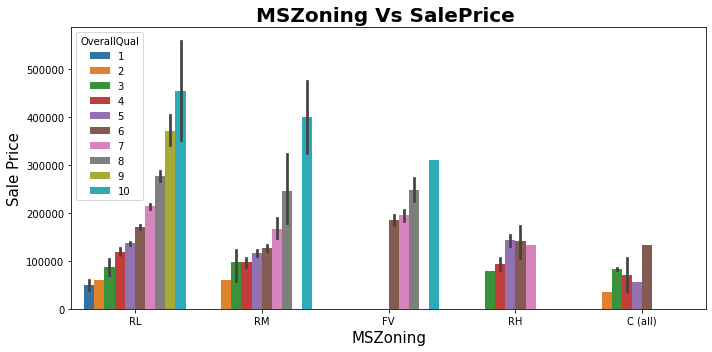

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x=train['MSZoning'], y=train['SalePrice'], hue= train["OverallQual"])
plt.title("MSZoning Vs SalePrice ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 15)
plt.ylabel('Sale Price',fontsize = 15)
plt.tight_layout()
plt.show()

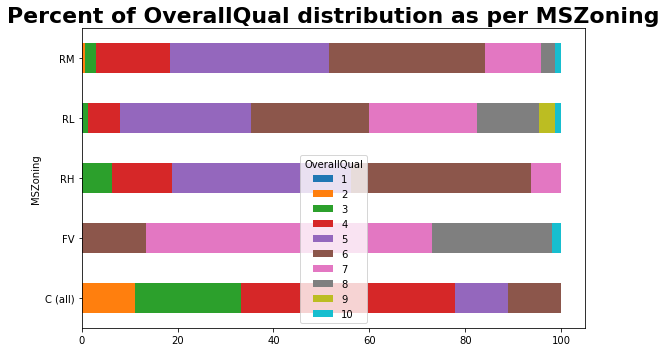

In [59]:
table= pd.crosstab(train['MSZoning'], train['OverallQual'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,5))
plt.title('Percent of OverallQual distribution as per MSZoning', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

### Observations:

1.Max property have overall condition rating of either 6 to 7.

2.Avg saling price for RL zone property is 200000-500000 .

3.In Commerical zone the property price is minimum.

4.Sale Price inside RL Zone is much higher than other zone.

5.It is clear that if OverallQual increased, SalePrice allso increased.

### For LotFrontage:

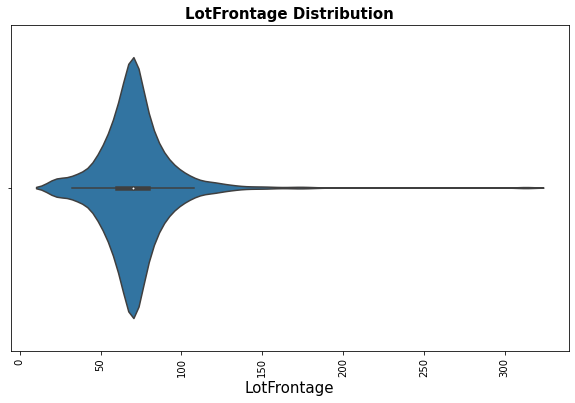

In [60]:
plt.subplots(figsize=(10,6))
sns.violinplot(train.LotFrontage,data=train)
plt.title('LotFrontage Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

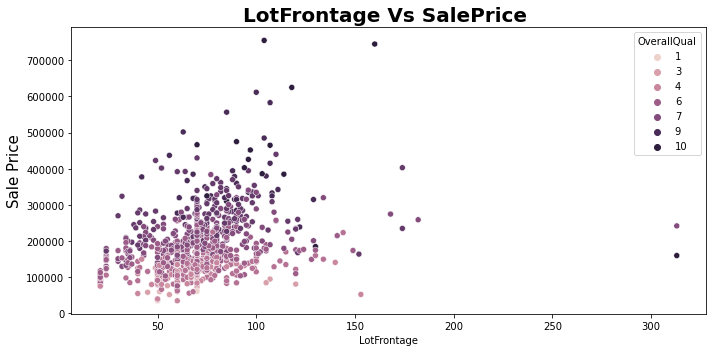

In [61]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=train['LotFrontage'], y=train['SalePrice'], hue= train["OverallQual"])
plt.title("LotFrontage Vs SalePrice ",fontsize=20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 15)
plt.tight_layout()
plt.show()

### Observations:
LotFrontage: Linear feet of street connected to property

1.avg LotFrontage is around 50-80

2.A lot of outliers are presnt.

3.There is No Significant relationship found between SalePrice & LotFrontage.

## For LotArea:

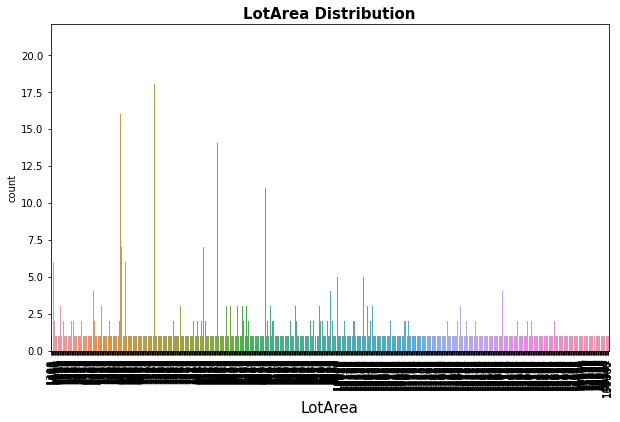

In [62]:
plt.subplots(figsize=(10,6))
sns.countplot('LotArea',data=train)
plt.title('LotArea Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('LotArea',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

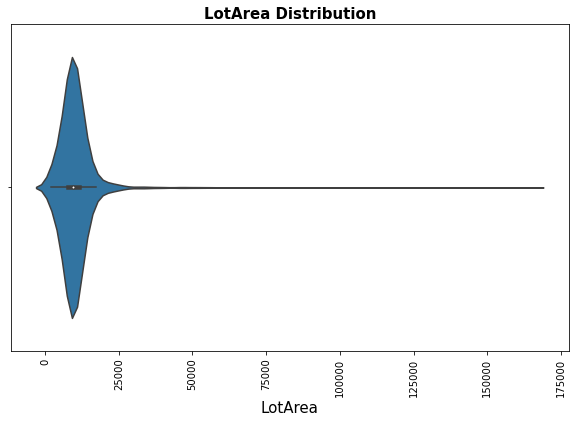

In [63]:
plt.subplots(figsize=(10,6))
sns.violinplot(train.LotArea,data=train)
plt.title('LotArea Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('LotArea',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

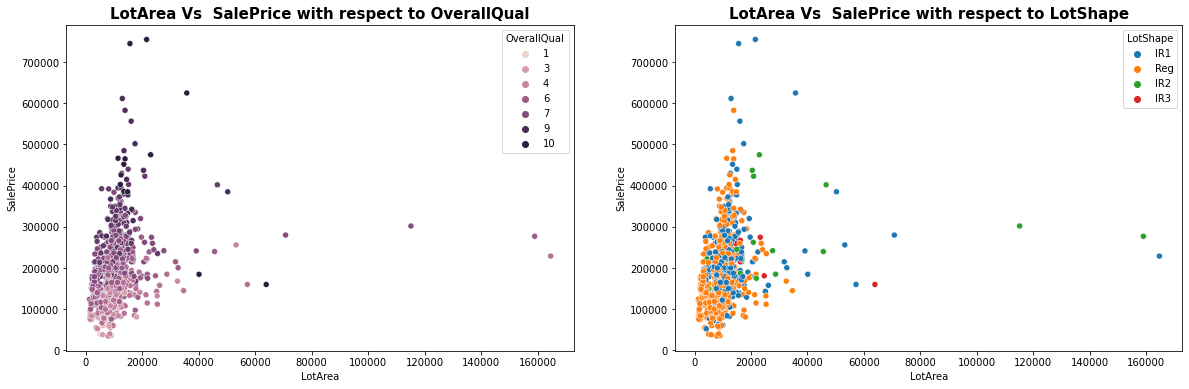

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.scatterplot(x=train['LotArea'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0])
ax[0].set_title('LotArea Vs  SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')
sns.scatterplot(x=train['LotArea'], y=train['SalePrice'], hue= train["LotShape"],ax=ax[1])
ax[1].set_title('LotArea Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

### Observations:
LotArea: Lot size in square feet

1.avg LotArea is around 0-25000

2.A lot of outliers are presnt.

3.As OverallQual increased, saling price of the property also increased.

4.no relation is found between LotArea and SalePrice with respect to LotShape.

## For LotShape:

In [65]:
train["LotShape"].value_counts()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

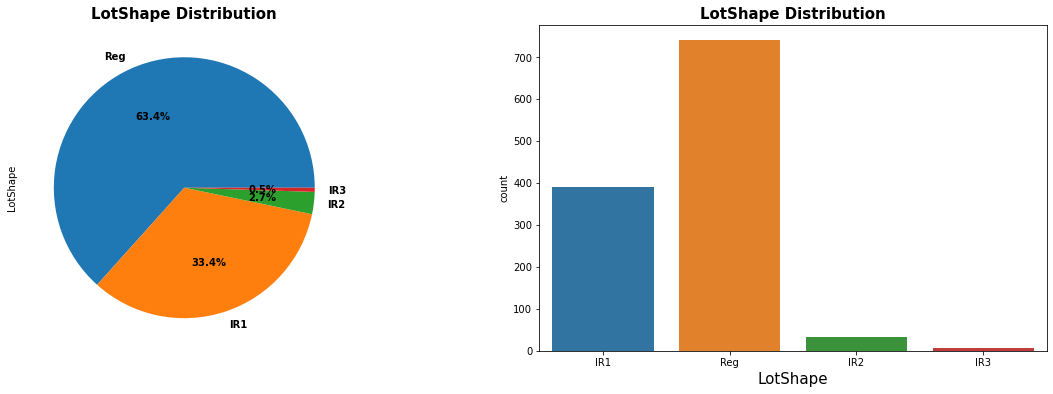

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['LotShape'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('LotShape Distribution', fontsize=15,fontweight ='bold')
sns.countplot('LotShape',data=train,ax=ax[1])
ax[1].set_title('LotShape Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('LotShape',fontsize=15)
plt.show()


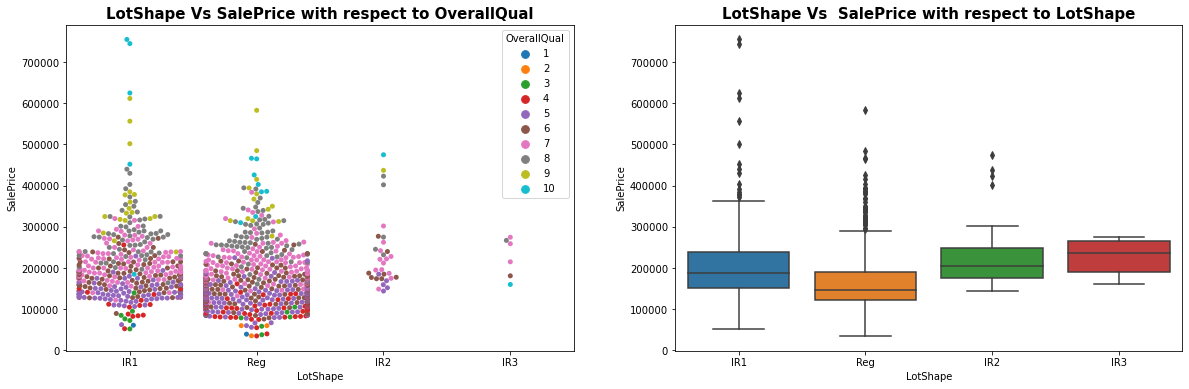

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.swarmplot(x=train['LotShape'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0])
ax[0].set_title('LotShape Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['LotShape'], y=train['SalePrice'],ax=ax[1])
ax[1].set_title('LotShape Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

### Observations:
LotShape: General shape of property

   Reg	Regular	
   IR1	Slightly irregular
   IR2	Moderately Irregular
   IR3	Irregular

1.Min LotShape is Irregular.

2.63.4% LotShape is Regular followed by Slightly irregular and there is some outliers also with very high price range

3.There is no relationship between LotShape and selling price

## For LandContour:

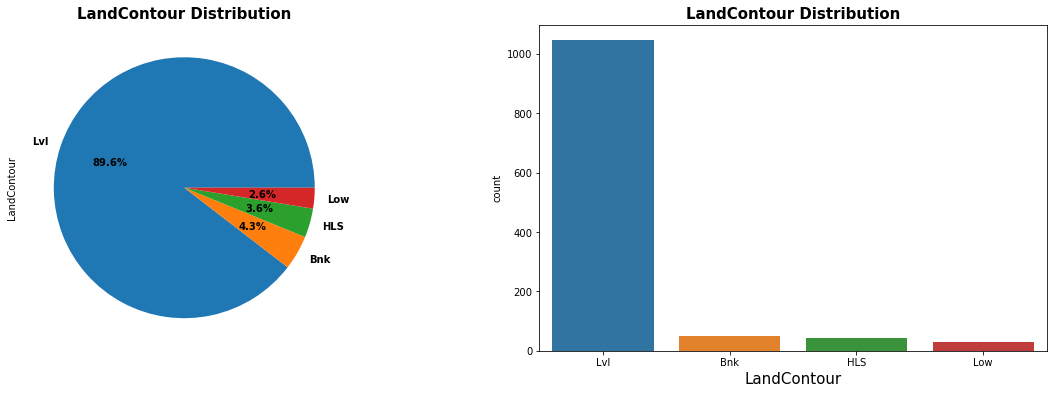

In [68]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['LandContour'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('LandContour Distribution', fontsize=15,fontweight ='bold')
sns.countplot('LandContour',data=train,ax=ax[1])
ax[1].set_title('LandContour Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('LandContour',fontsize=15)
plt.show()

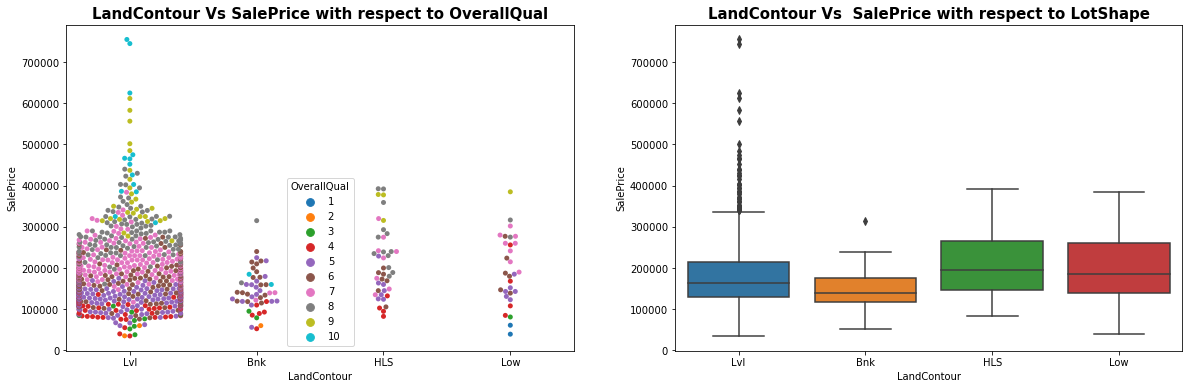

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.swarmplot(x=train['LandContour'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0])
ax[0].set_title('LandContour Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['LandContour'], y=train['SalePrice'],ax=ax[1])
ax[1].set_title('LandContour Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

### Observations:
LandContour: Flatness of the property

   Lvl	Near Flat/Level	
   Bnk	Banked - Quick and significant rise from street grade to building
   HLS	Hillside - Significant slope from side to side
   Low	Depression

1.Around 90% property is in Level land contour type. It is quite obvious also!!

2.Banked area is the less costly area compare to others.

### for LotConfig:

In [70]:
train["LotConfig"].value_counts()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

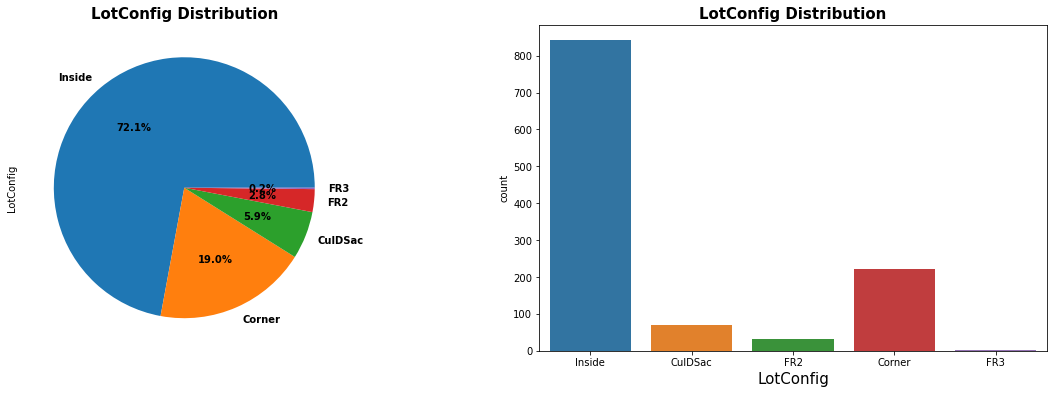

In [71]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['LotConfig'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('LotConfig Distribution', fontsize=15,fontweight ='bold')
sns.countplot('LotConfig',data=train,ax=ax[1])
ax[1].set_title('LotConfig Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('LotConfig',fontsize=15)
plt.show()

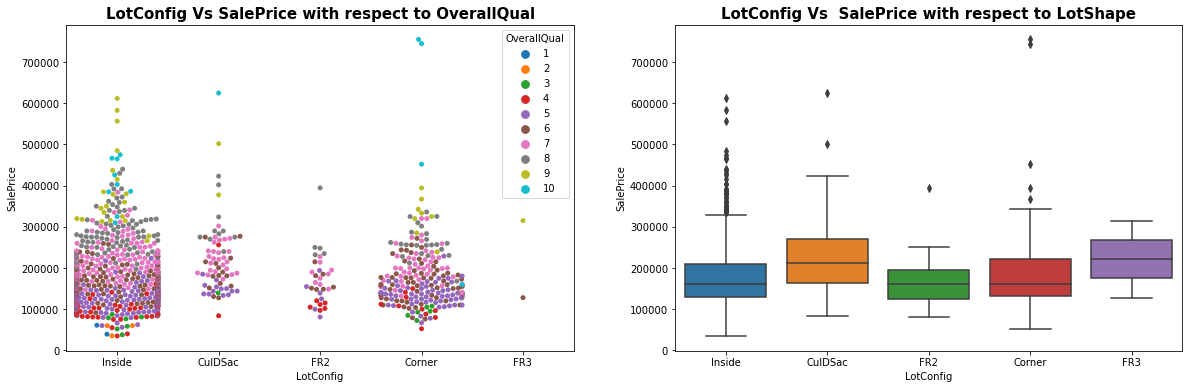

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.swarmplot(x=train['LotConfig'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0])
ax[0].set_title('LotConfig Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['LotConfig'], y=train['SalePrice'],ax=ax[1])
ax[1].set_title('LotConfig Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

### Observations:
LotConfig: Lot configuration

   Inside	Inside lot
   Corner	Corner lot
   CulDSac	Cul-de-sac
   FR2	Frontage on 2 sides of property
   FR3	Frontage on 3 sides of property

1.72.1% of house comes with inside Lot configuration.

2.Cheapest property are in Inside lot configuration.

3.Only 2 are in Frontage on 3 sides of property.

### For LandSlope, and Neighborhood :

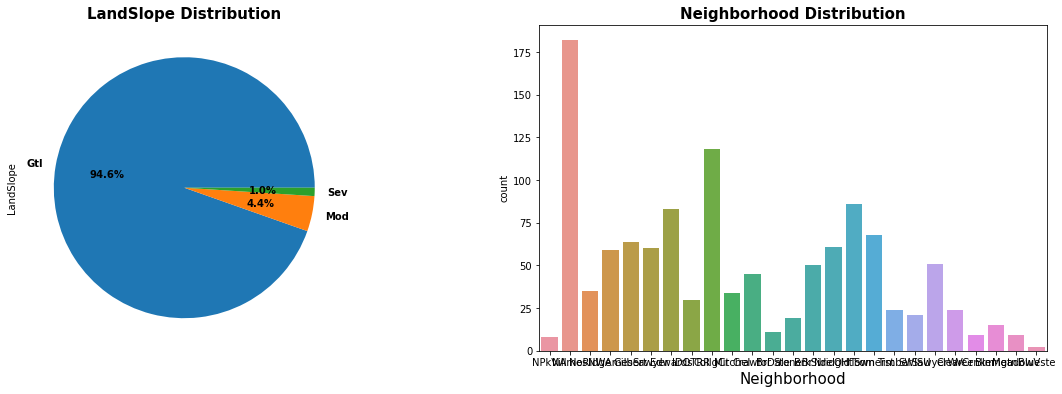

In [73]:
f,ax=plt.subplots(1,2,figsize=(20,6))

train['LandSlope'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('LandSlope Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Neighborhood',data=train,ax=ax[1])
ax[1].set_title('Neighborhood Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('Neighborhood',fontsize=15)
plt.show()

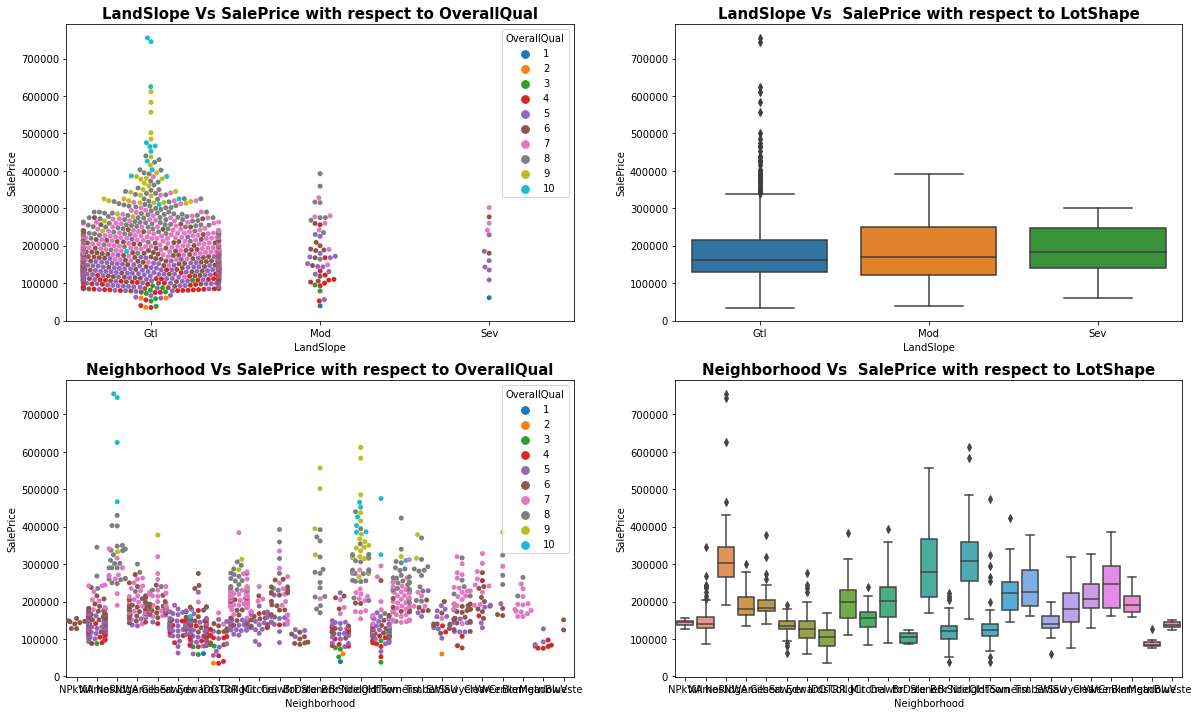

In [74]:
f,ax=plt.subplots(2,2,figsize=(20,12))

sns.swarmplot(x=train['LandSlope'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0, 0])
ax[0,0].set_title('LandSlope Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['LandSlope'], y=train['SalePrice'],ax=ax[0,1])
ax[0, 1].set_title('LandSlope Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')

sns.swarmplot(x=train['Neighborhood'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[1, 0])
ax[1,0].set_title('Neighborhood Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['Neighborhood'], y=train['SalePrice'],ax=ax[1,1])
ax[1, 1].set_title('Neighborhood Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

# Observations:
LandSlope: Slope of property Gtl Gentle slope Mod Moderate Slope Sev Severe Slope

Neighborhood: Physical locations within Ames city limits

   Blmngtn	 Bloomington Heights
   
   Blueste	 Bluestem
   
   BrDale	 Briardale
   
   BrkSide	 Brookside
   
   ClearCr	 Clear Creek
   
   CollgCr	 College Creek
   
   Crawfor	 Crawford
   
   Edwards	 Edwards
   
   Gilbert	 Gilbert
   
   IDOTRR	 Iowa DOT and Rail Road
   
   MeadowV	Meadow Village
   
   Mitchel	Mitchell
   
   Names	North Ames
   
   NoRidge	Northridge
   
   NPkVill	Northpark Villa
   
   NridgHt	Northridge Heights
   
   NWAmes	Northwest Ames
   
   OldTown	Old Town
   
   SWISU	South & West of Iowa State University
   
   Sawyer	Sawyer
   
   SawyerW	Sawyer West
   
   Somerst	Somerset
   
   StoneBr	Stone Brook
   
   Timber	Timberland
   
   Veenker	Veenker

1.95% LandSlope is Gentle slope.

2.1% properties come with severe slope and the avg price is high compare to Gentle slope.

3.Max Neighborhood is Names with 182 values.

### For Condition1, and Condition2 :

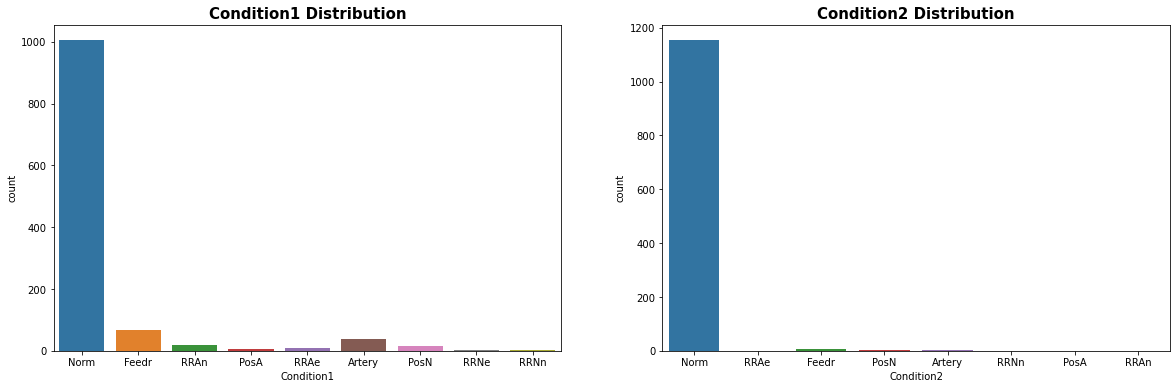

In [75]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.countplot('Condition1',data=train,ax=ax[0])
ax[0].set_title('Condition1 Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Condition2',data=train,ax=ax[1])
ax[1].set_title('Condition2 Distribution',fontsize=15,fontweight ='bold')
plt.show()

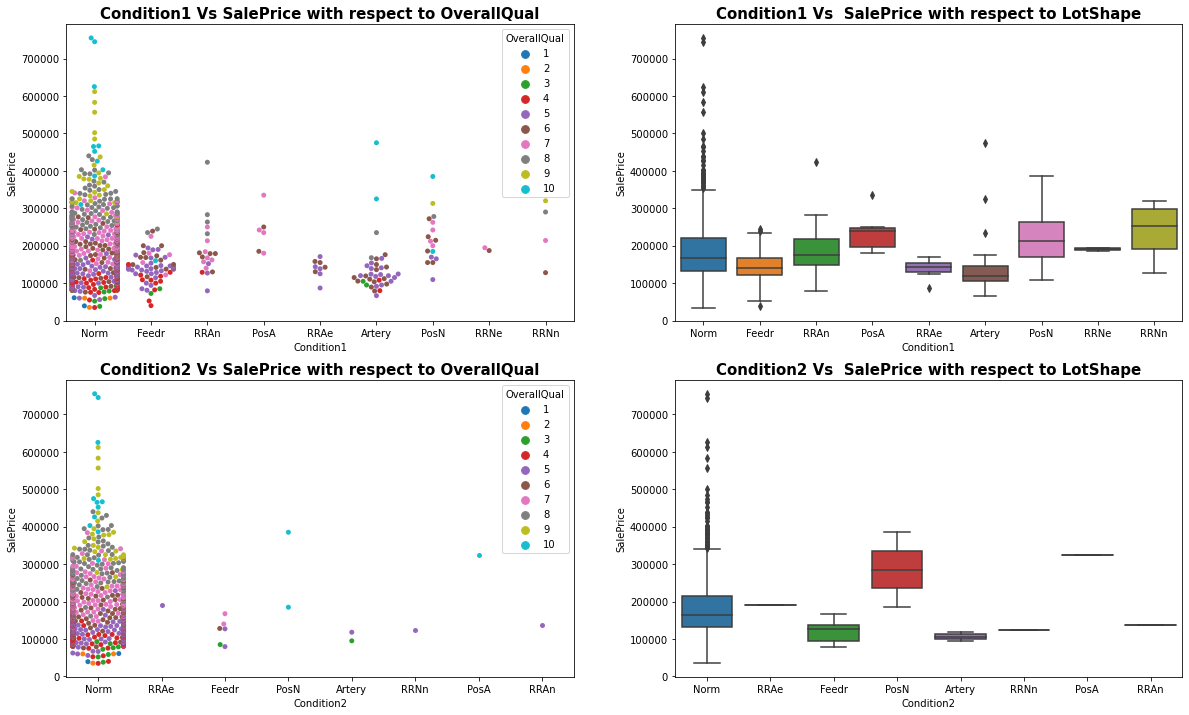

In [76]:
f,ax=plt.subplots(2,2,figsize=(20,12))

sns.swarmplot(x=train['Condition1'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0, 0])
ax[0,0].set_title('Condition1 Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['Condition1'], y=train['SalePrice'],ax=ax[0,1])
ax[0, 1].set_title('Condition1 Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')

sns.swarmplot(x=train['Condition2'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[1, 0])
ax[1,0].set_title('Condition2 Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['Condition2'], y=train['SalePrice'],ax=ax[1,1])
ax[1, 1].set_title('Condition2 Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

In [77]:
train["Condition1"].value_counts()

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [78]:
train["Condition2"].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

### Observations:
Condition1 and Condition2: Proximity to various conditions (if more than one is present)
Artery Adjacent to arterial street Feedr Adjacent to feeder street Norm Normal RRNn Within 200' of North-South Railroad RRAn Adjacent to North-South Railroad PosN Near positive off-site feature--park, greenbelt, etc. PosA Adjacent to postive off-site feature RRNe Within 200' of East-West Railroad RRAe Adjacent to East-West Railroad

1.For maximum case the condition is Normal. And there is no such relationship is present in the above graph. Let's Drop these two columns.

In [79]:
train.drop(["Condition1", "Condition2"], axis=1, inplace= True)

## For BldgType and HouseStyle :

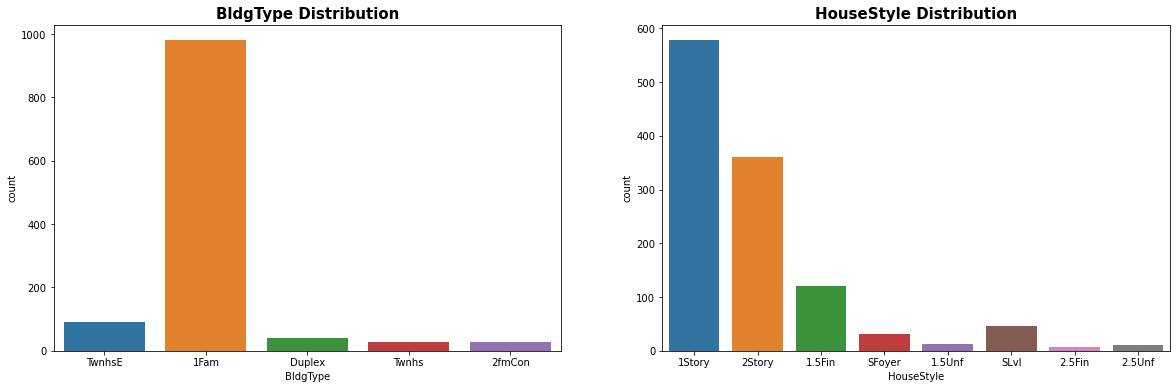

In [80]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.countplot('BldgType',data=train,ax=ax[0])
ax[0].set_title('BldgType Distribution', fontsize=15,fontweight ='bold')
sns.countplot('HouseStyle',data=train,ax=ax[1])
ax[1].set_title('HouseStyle Distribution',fontsize=15,fontweight ='bold')
plt.show()

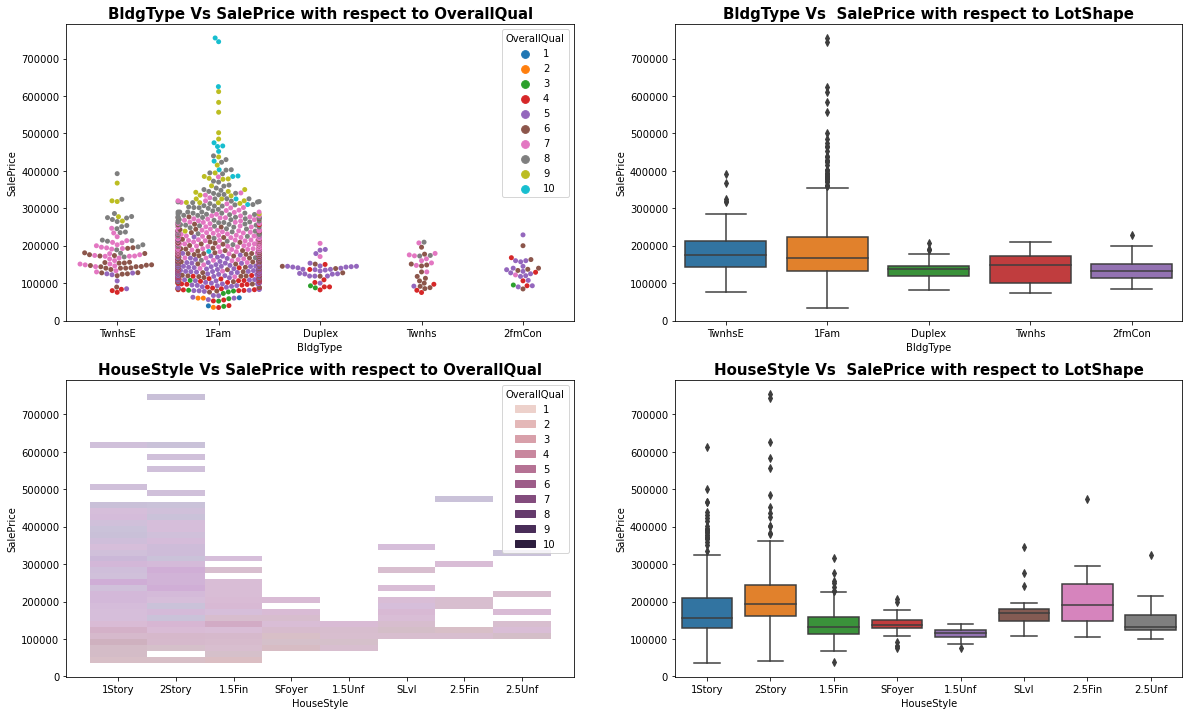

In [81]:
f,ax=plt.subplots(2,2,figsize=(20,12))

sns.swarmplot(x=train['BldgType'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0, 0])
ax[0,0].set_title('BldgType Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['BldgType'], y=train['SalePrice'],ax=ax[0,1])
ax[0, 1].set_title('BldgType Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')

sns.histplot(x=train['HouseStyle'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[1, 0])
ax[1,0].set_title('HouseStyle Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['HouseStyle'], y=train['SalePrice'],ax=ax[1,1])
ax[1, 1].set_title('HouseStyle Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

### Observations:
BldgType: Type of dwelling 1Fam Single-family Detached 2FmCon Two-family Conversion; originally built as one-family dwelling Duplx Duplex TwnhsE Townhouse End Unit TwnhsI Townhouse Inside Unit

HouseStyle: Style of dwelling
1Story One story 1.5Fin One and one-half story: 2nd level finished 1.5Unf One and one-half story: 2nd level unfinished 2Story Two story 2.5Fin Two and one-half story: 2nd level finished 2.5Unf Two and one-half story: 2nd level unfinished SFoyer Split Foyer SLvl Split Level

1.Around 1000 house properties are with building type Single-family Detached.

2.More than 550 House Properties are with building type one story.

3.Two story building is costlier than another.

### For 'OverallQual' and 'OverallCond':

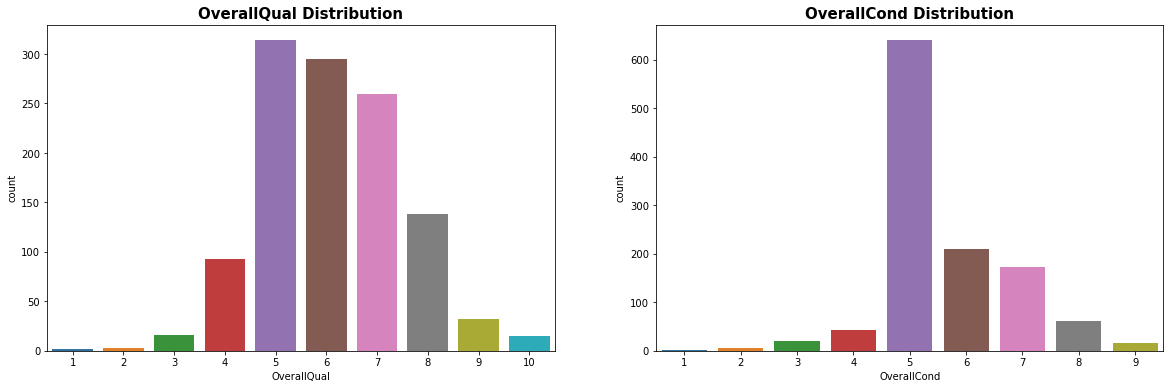

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.countplot('OverallQual',data=train,ax=ax[0])
ax[0].set_title('OverallQual Distribution', fontsize=15,fontweight ='bold')
sns.countplot('OverallCond',data=train,ax=ax[1])
ax[1].set_title('OverallCond Distribution',fontsize=15,fontweight ='bold')
plt.show()


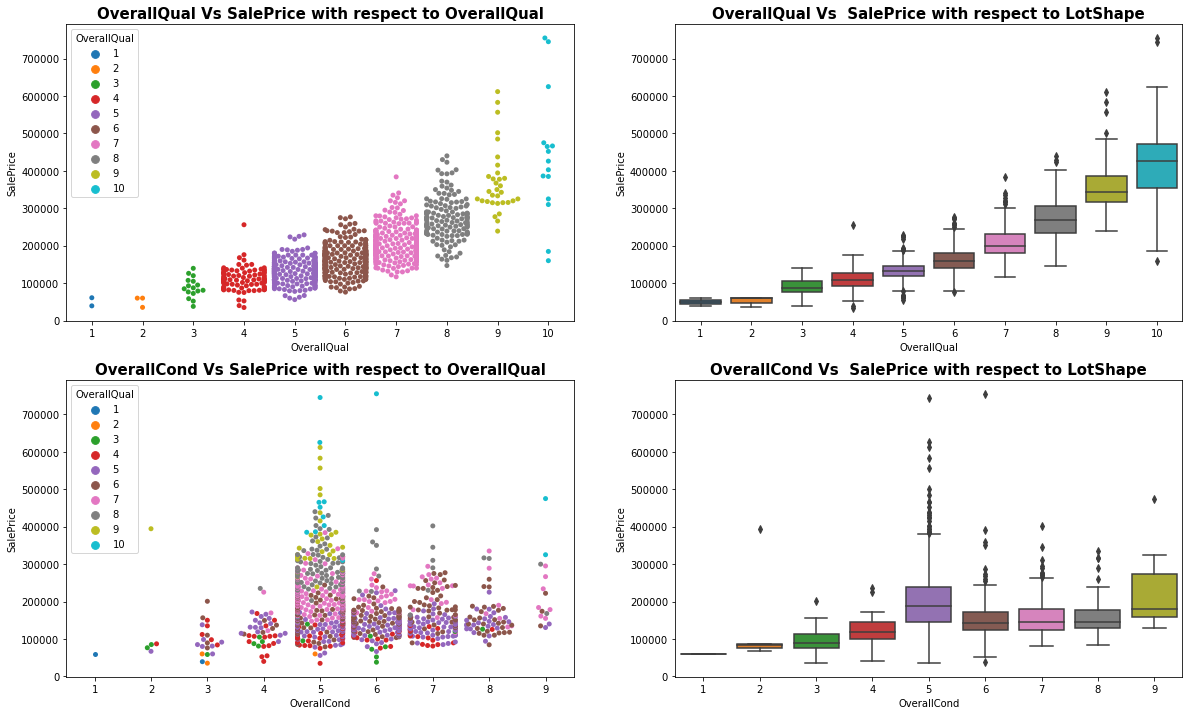

In [83]:
f,ax=plt.subplots(2,2,figsize=(20,12))

sns.swarmplot(x=train['OverallQual'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[0, 0])
ax[0,0].set_title('OverallQual Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['OverallQual'], y=train['SalePrice'],ax=ax[0,1])
ax[0, 1].set_title('OverallQual Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')

sns.swarmplot(x=train['OverallCond'], y=train['SalePrice'], hue= train["OverallQual"], ax=ax[1, 0])
ax[1,0].set_title('OverallCond Vs SalePrice with respect to OverallQual', fontsize=15,fontweight ='bold')

sns.boxplot(x=train['OverallCond'], y=train['SalePrice'],ax=ax[1,1])
ax[1, 1].set_title('OverallCond Vs  SalePrice with respect to LotShape',fontsize=15,fontweight ='bold')
plt.show()

### Observation:
OverallQual : Rates the overall material and finish of the house OverallCond: Rates the overall condition of the house

   10	Very Excellent
   9	Excellent
   8	Very Good
   7	Good
   6	Above Average
   5	Average
   4	Below Average
   3	Fair
   2	Poor
   1	Very Poor

1.Max OverallQual is with rating 5-7.

2.For OverallCond the max value is 5.

3.As usual if Overall Quality is increased, price is also increased.

4.price is max for OverallCond 5

### For 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation':

In [84]:
set1= ['RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType',  'ExterQual',
       'ExterCond', 'Foundation']

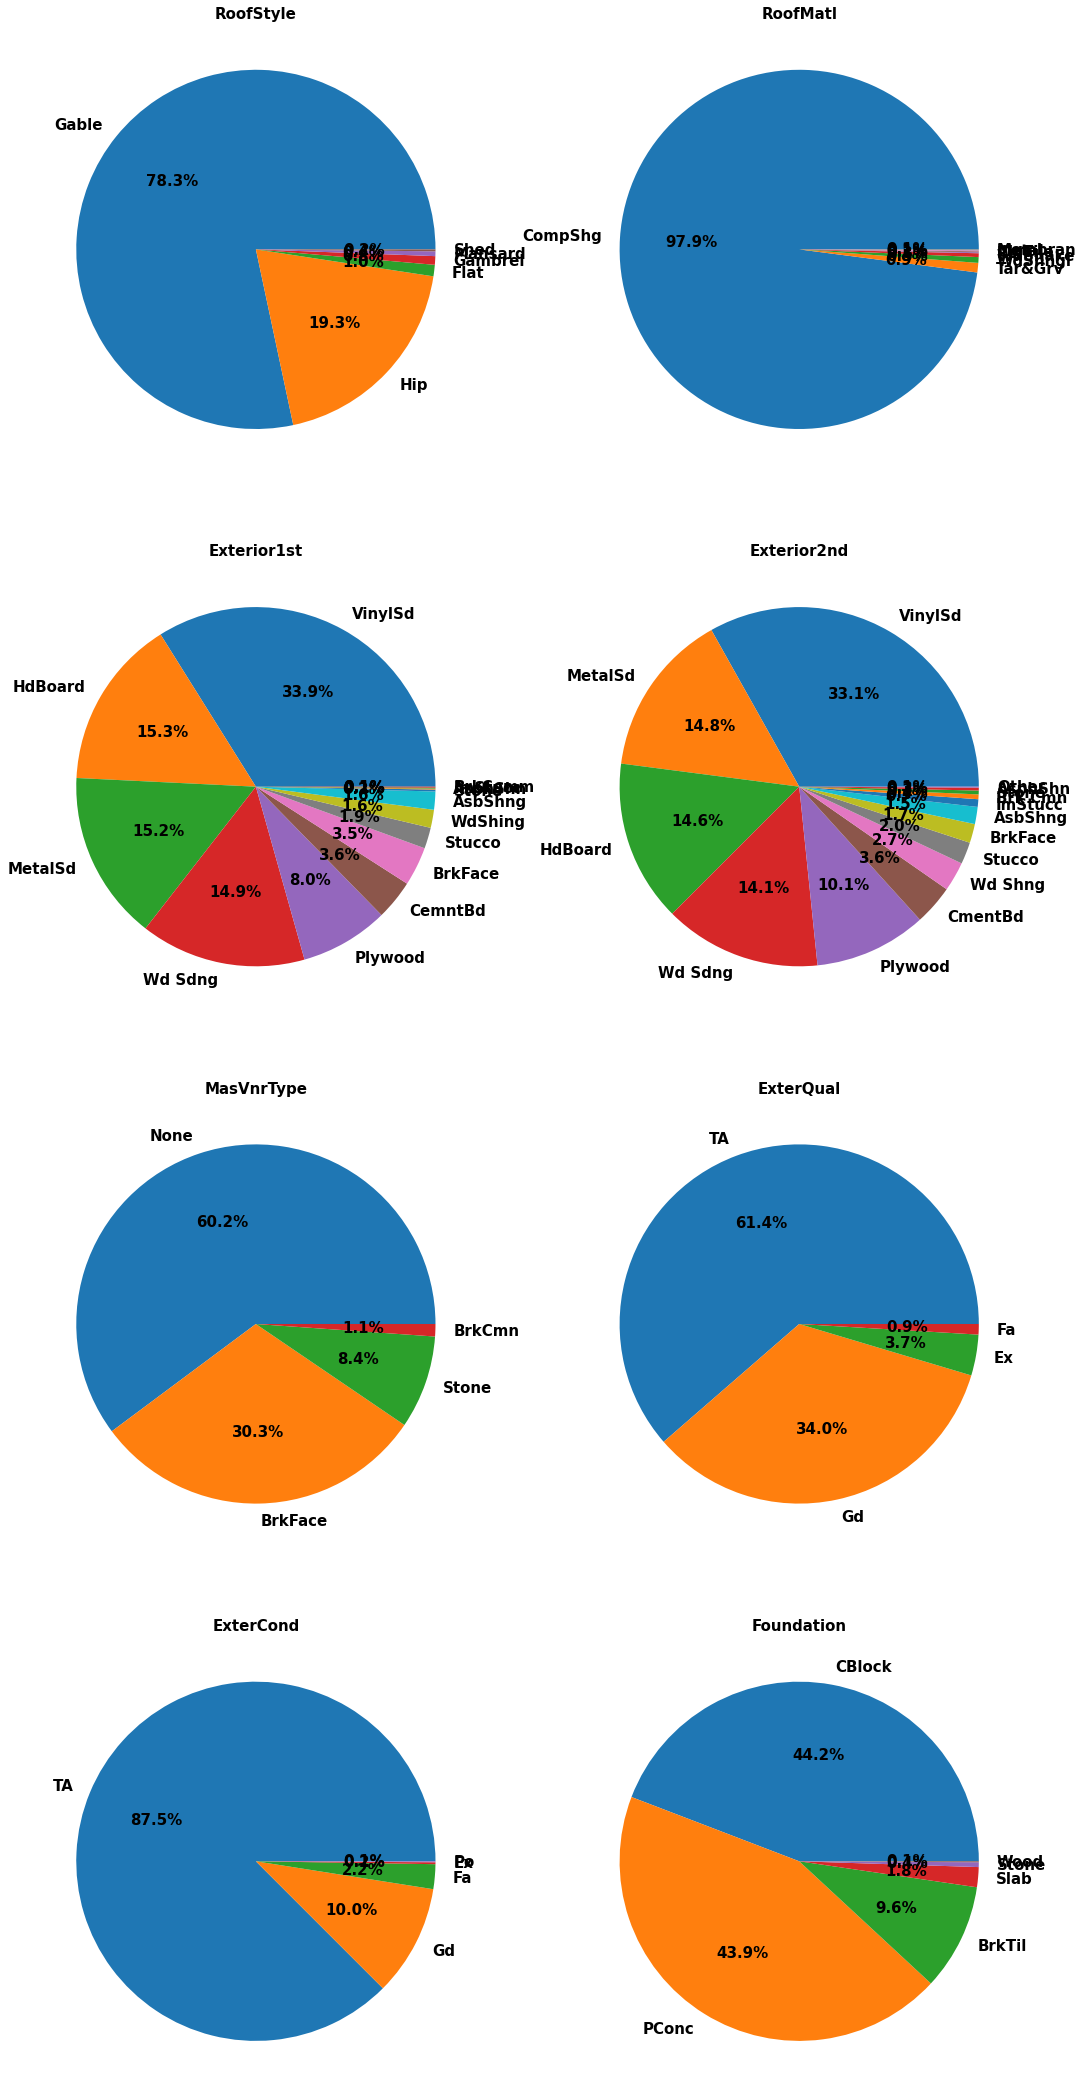

In [85]:
plt.figure(figsize=(15,30))
pltno =1
for i in set1:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        train[i].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':15})
        plt.title(i,fontsize=15,fontweight ='bold')
        plt.ylabel(' ')
    pltno+=1 
plt.tight_layout()
plt.show()

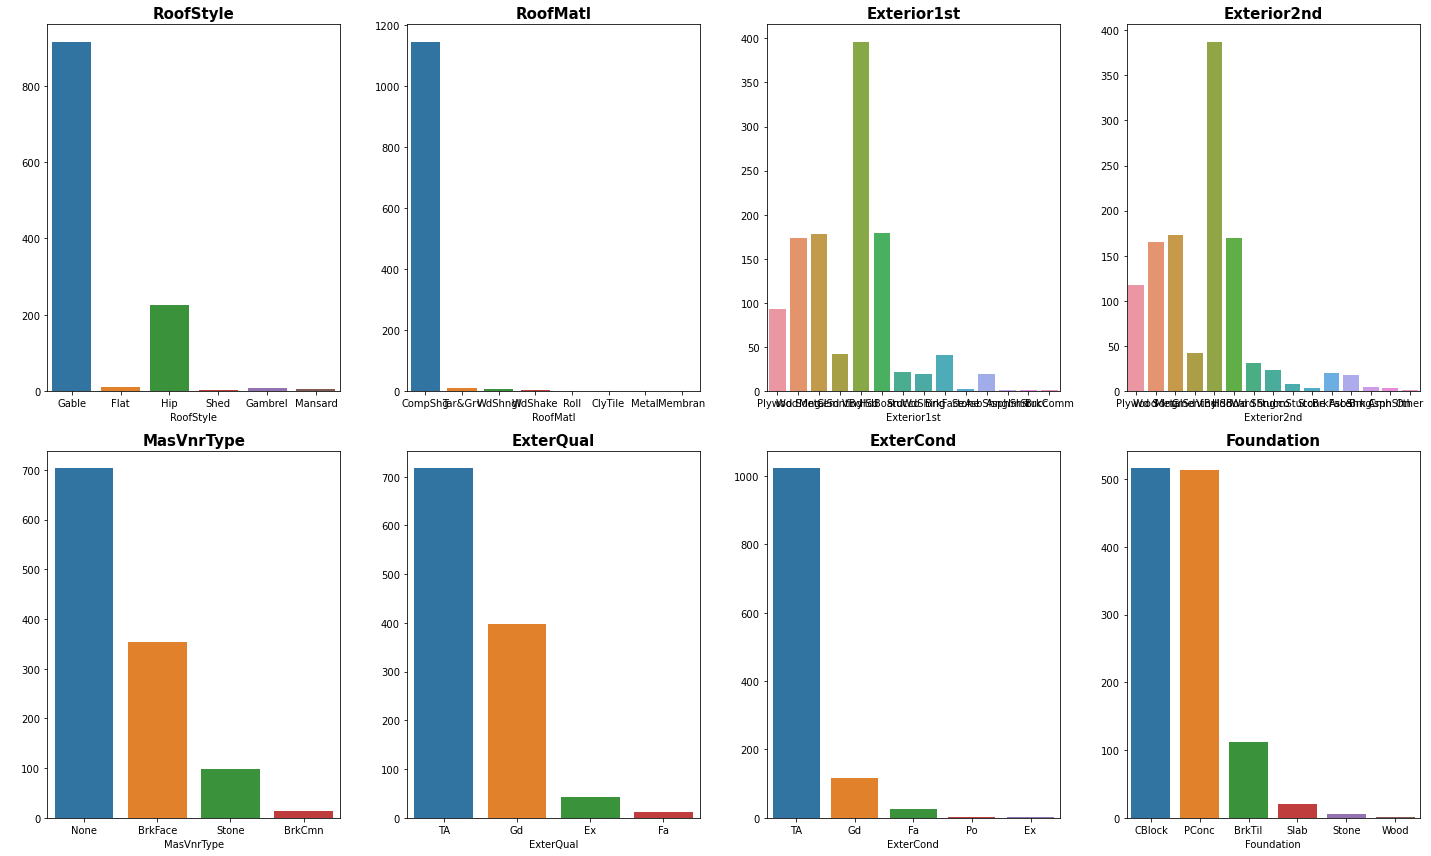

In [86]:
plt.figure(figsize=(20,12))
pltno =1
for i in set1:
    if pltno <=8:
        ax = plt.subplot(2,4,pltno)
        sns.countplot(train[i])
        plt.title(i,fontsize=15,fontweight ='bold')
        plt.ylabel(' ')
    pltno+=1 
plt.tight_layout()
plt.show()

### Observation:

#### RoofStyle: Type of roof

   Flat	Flat
   
   Gable	Gable
   
   Gambrel	Gabrel (Barn)
   
   Hip	Hip
   
   Mansard	Mansard
   
   Shed	Shed

#### RoofMatl: Roof material

   ClyTile	Clay or Tile
   
   CompShg	Standard (Composite) Shingle
   
   Membran	Membrane
   
   Metal	Metal
   
   Roll	Roll
   
   Tar&Grv	Gravel & Tar
   
   WdShake	Wood Shakes
   
   WdShngl	Wood Shingles

#### Exterior1st: Exterior covering on house

#### Exterior2nd: Exterior covering on house (if more than one material)

   AsbShng	Asbestos Shingles
   
   AsphShn	Asphalt Shingles
   
   BrkComm	Brick Common
   
   BrkFace	Brick Face
   
   CBlock	Cinder Block
   
   CemntBd	Cement Board
   
   HdBoard	Hard Board
   
   ImStucc	Imitation Stucco
   
   MetalSd	Metal Siding
   
   Other	Other
   
   Plywood	Plywood
   
   PreCast	PreCast	
   
   Stone	Stone
   
   Stucco	Stucco
   
   VinylSd	Vinyl Siding
   
   Wd Sdng	Wood Siding
   
   WdShing	Wood Shingles

#### MasVnrType: Masonry veneer type

   BrkCmn	Brick Common
   
   BrkFace	Brick Face
   
   CBlock	Cinder Block
   
   None	    None
   
   Stone	Stone

### ExterQual: 
    Evaluates the quality of the material on the exterior Ex Excellent Gd Good TA Average/Typical Fa Fair Po Poor

#### ExterCond: 
    Evaluates the present condition of the material on the exterior Ex Excellent Gd Good TA Average/Typical Fa Fair Po Poor Foundation: Type of foundation BrkTil Brick & Tile CBlock Cinder Block PConc Poured Contrete Slab Slab Stone Stone Wood Wood

1.78.3% house is with Gable RoofStyle followed by 19.3 % house is with Hip Style.

2.98% material is Standard (Composite) Shingle and other 7 types are only 2% togetherly.

3.Around 33% material is Vinyl Siding as Exterior covering on house for both Exterior1st and Exterior2nd.

4.Around 60% of house comes with None as Masonry veneer type . Maybe there is some mistake during entry the data.

5.Around 60% of house comes with Average quality of the material on the exterior.

6.87.5% of house comes with Average/Typical as the present condition of the material on the exterior.

7.Around 44% of house comes with both Cinder Block and Poured Contrete both Type of foundation.

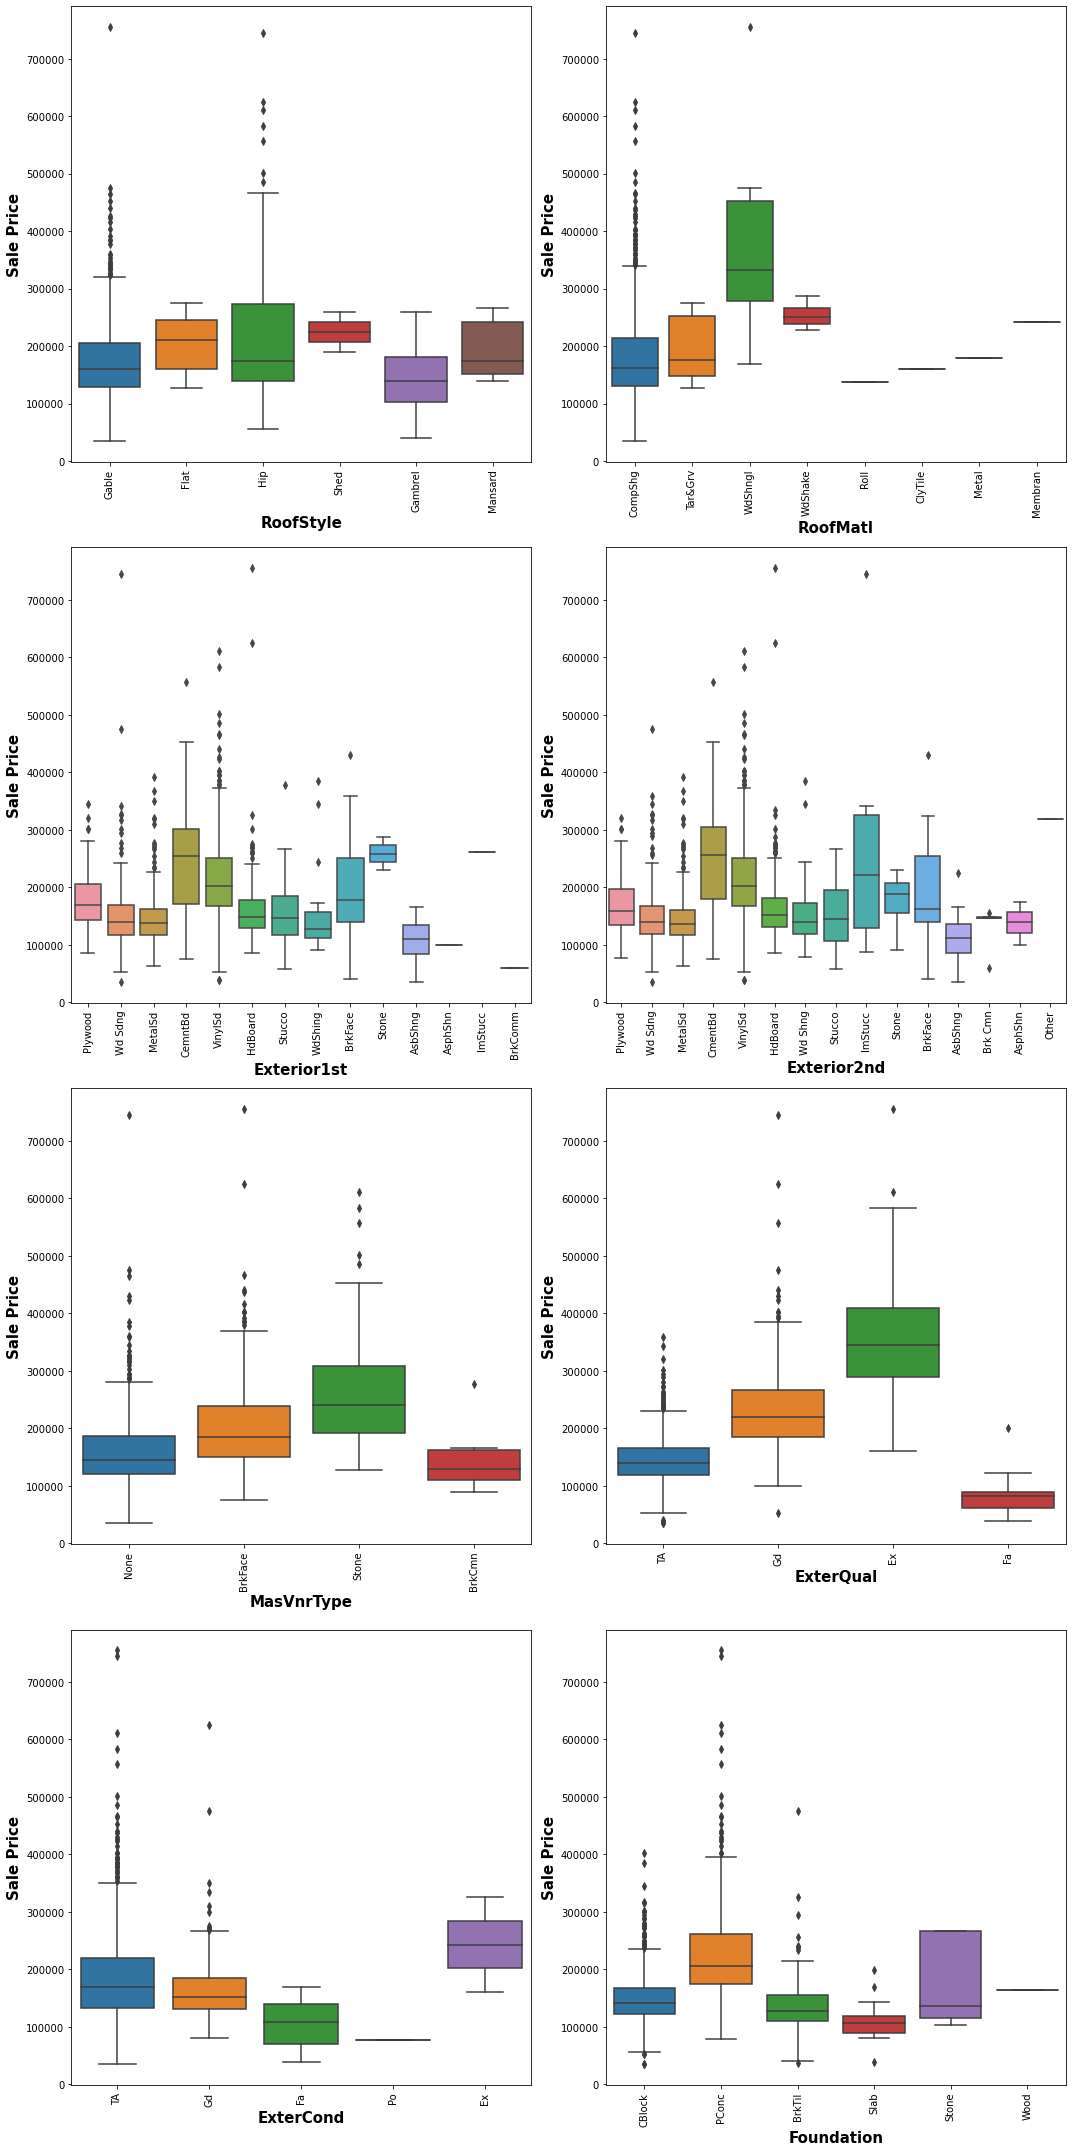

In [87]:
plt.figure(figsize=(15,30))
pltno =1
for i in set1:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        sns.boxplot(x= train[i], y = train['SalePrice'])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
        plt.xticks(rotation=90)
    pltno+=1 
plt.tight_layout()
plt.show()

Observation:

1.Hip style Roof are much costly than rest of the roof style.

2.Wood Shingles is much costly than rest of the roof material.

3.Cement Board is much costly than rest of the Exterior covering on house.

4.The house made with stone as Masonry veneer is most costlier type.

5.Very obviously costlier house come with Excellent and Good exterior quality.

6.Pconc foundation are mostly use in costly housing properties.

### For 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'

In [88]:
set2= ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir']

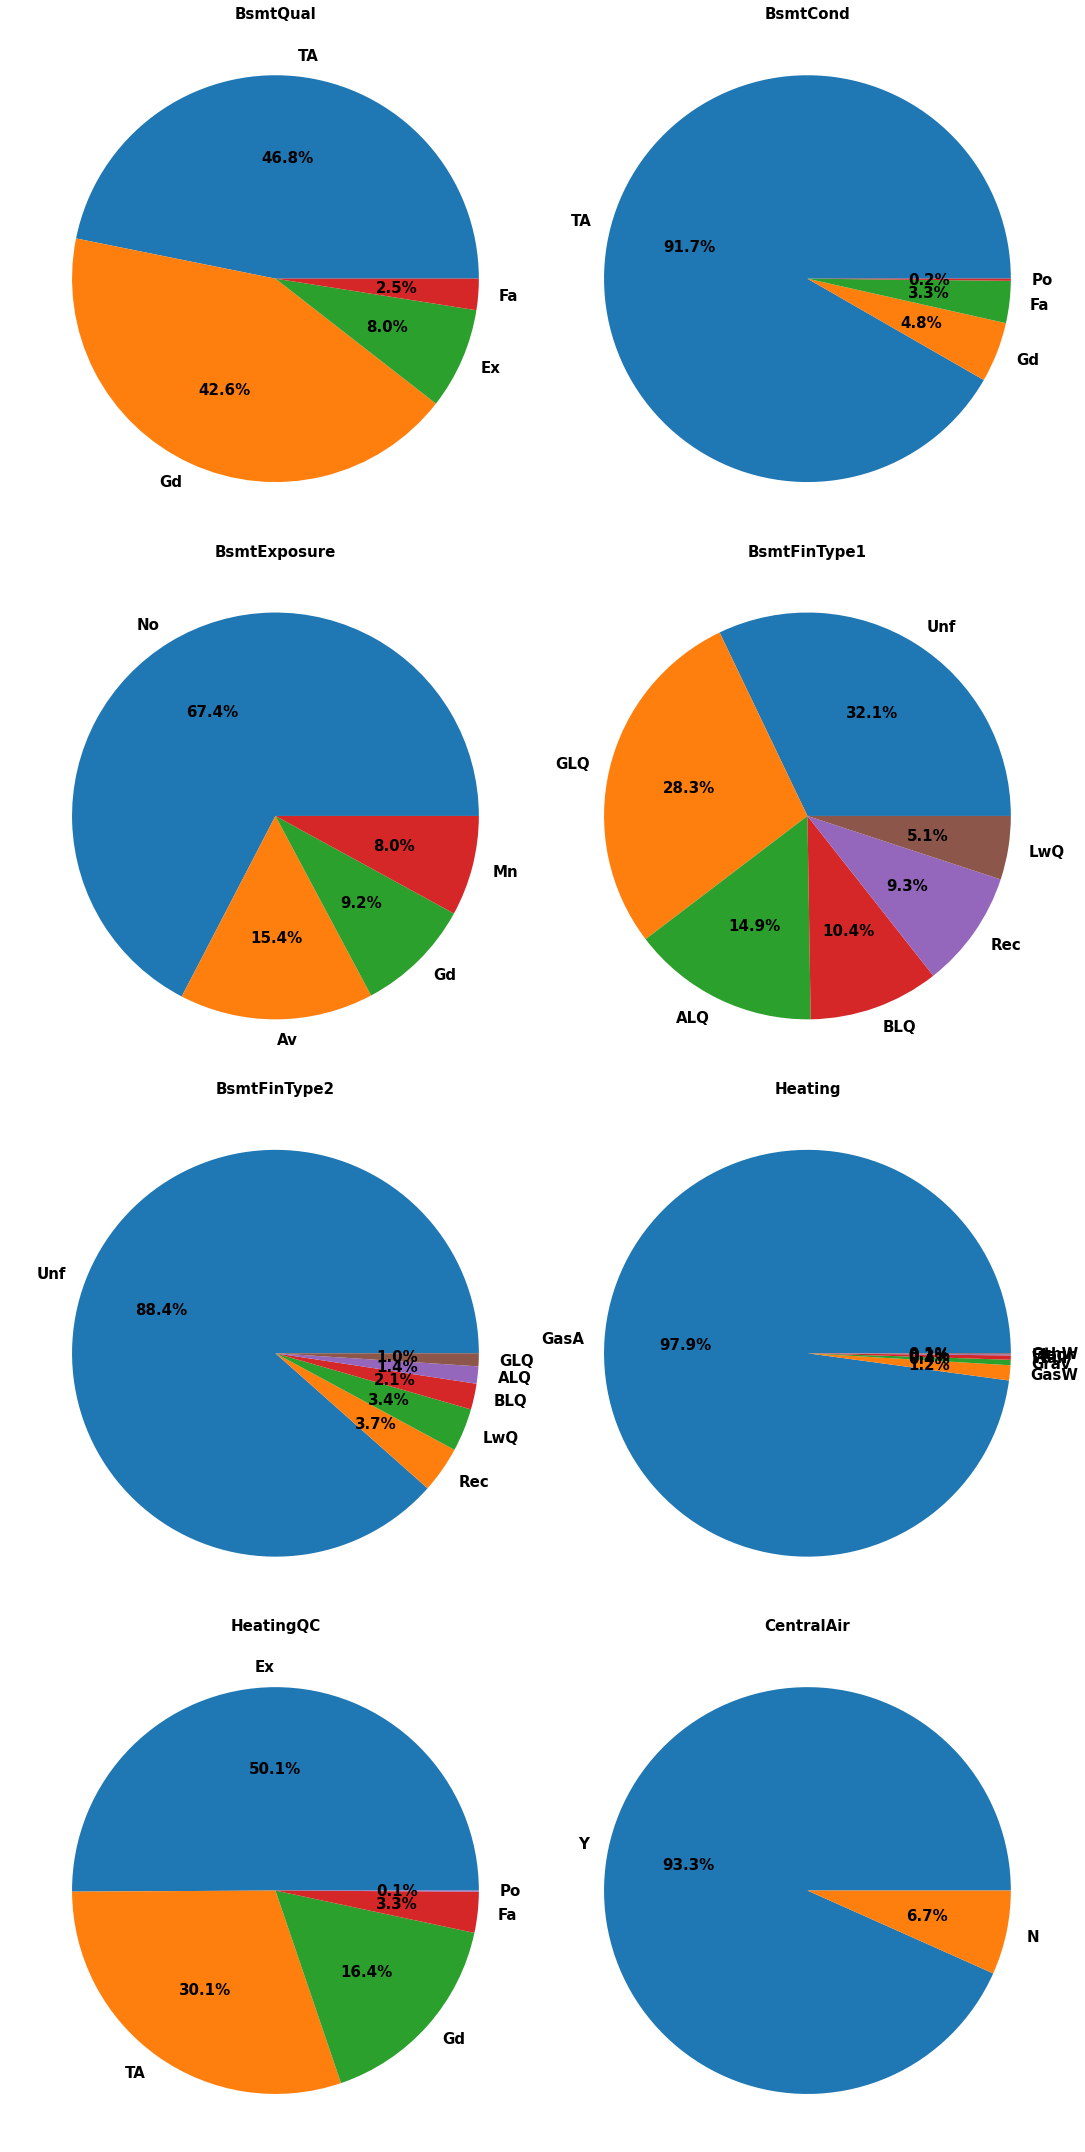

In [89]:
plt.figure(figsize=(15,30))
pltno =1
for i in set2:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        train[i].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':15})
        plt.title(i,fontsize=15,fontweight ='bold')
        plt.ylabel(' ')
    pltno+=1 
plt.tight_layout()
plt.show()

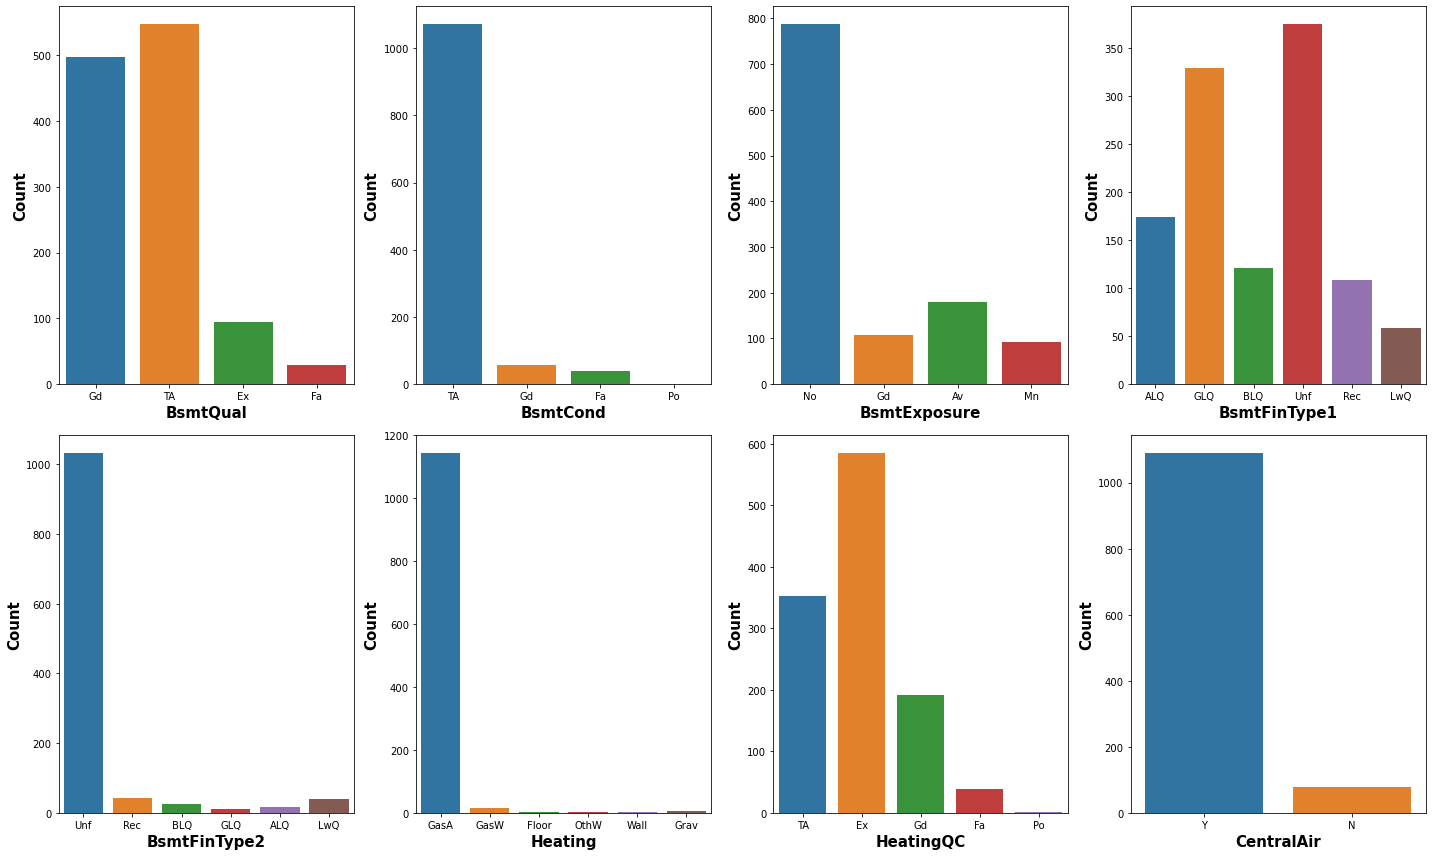

In [90]:
plt.figure(figsize=(20,12))
pltno =1
for i in set2:
    if pltno <=8:
        ax = plt.subplot(2,4,pltno)
        sns.countplot(train[i])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Count', fontsize=15,fontweight ='bold' )
    pltno+=1 
plt.tight_layout()
plt.show()

### Observations:

#### BsmtQual: 
Evaluates the height of the basement

   Ex	Excellent (100+ inches)	
   
   Gd	Good (90-99 inches)
   
   TA	Typical (80-89 inches)
   
   Fa	Fair (70-79 inches)
   
   Po	Poor (<70 inches
   
   NA	No Basement

#### BsmtCond: 
Evaluates the general condition of the basement

   Ex	Excellent
   
   Gd	Good
   
   TA	Typical - slight dampness allowed
   
   Fa	Fair - dampness or some cracking or settling
   
   Po	Poor - Severe cracking, settling, or wetness
   
   NA	No Basement

#### BsmtExposure: 
Refers to walkout or garden level walls

   Gd	Good Exposure
   
   Av	Average Exposure (split levels or foyers typically score average or above)	
   
   Mn	Mimimum Exposure
   
   No	No Exposure
   
   NA	No Basement

#### BsmtFinType1: 
Rating of basement finished area

#### BsmtFinType2: 
Rating of basement finished area (if multiple types)

   GLQ	Good Living Quarters
   
   ALQ	Average Living Quarters
   
   BLQ	Below Average Living Quarters	
   
   Rec	Average Rec Room
   
   LwQ	Low Quality
   
   Unf	Unfinshed
   
   NA	No Basement

#### Heating: 
Type of heating Floor Floor Furnace GasA Gas forced warm air furnace GasW Gas hot water or steam heat Grav Gravity furnace OthW Hot water or steam heat other than gas Wall Wall furnace HeatingQC: Heating quality and condition

   Ex	Excellent
   
   Gd	Good
   
   TA	Average/Typical
   
   Fa	Fair
   
   Po	Poor

#### CentralAir: 
Central air conditioning

   N	No
   Y	Yes

1.Good and Typical are the maximum used basement height.

2.max number of house is No Exposure with respect to Refers to walkout or garden level walls.

3.most of the housing type are Good Living Quarters or Unfinshed.

4.For maximum case, the Type of heating is Gas forced warm air furnace

5.Max House is Central air conditioning.

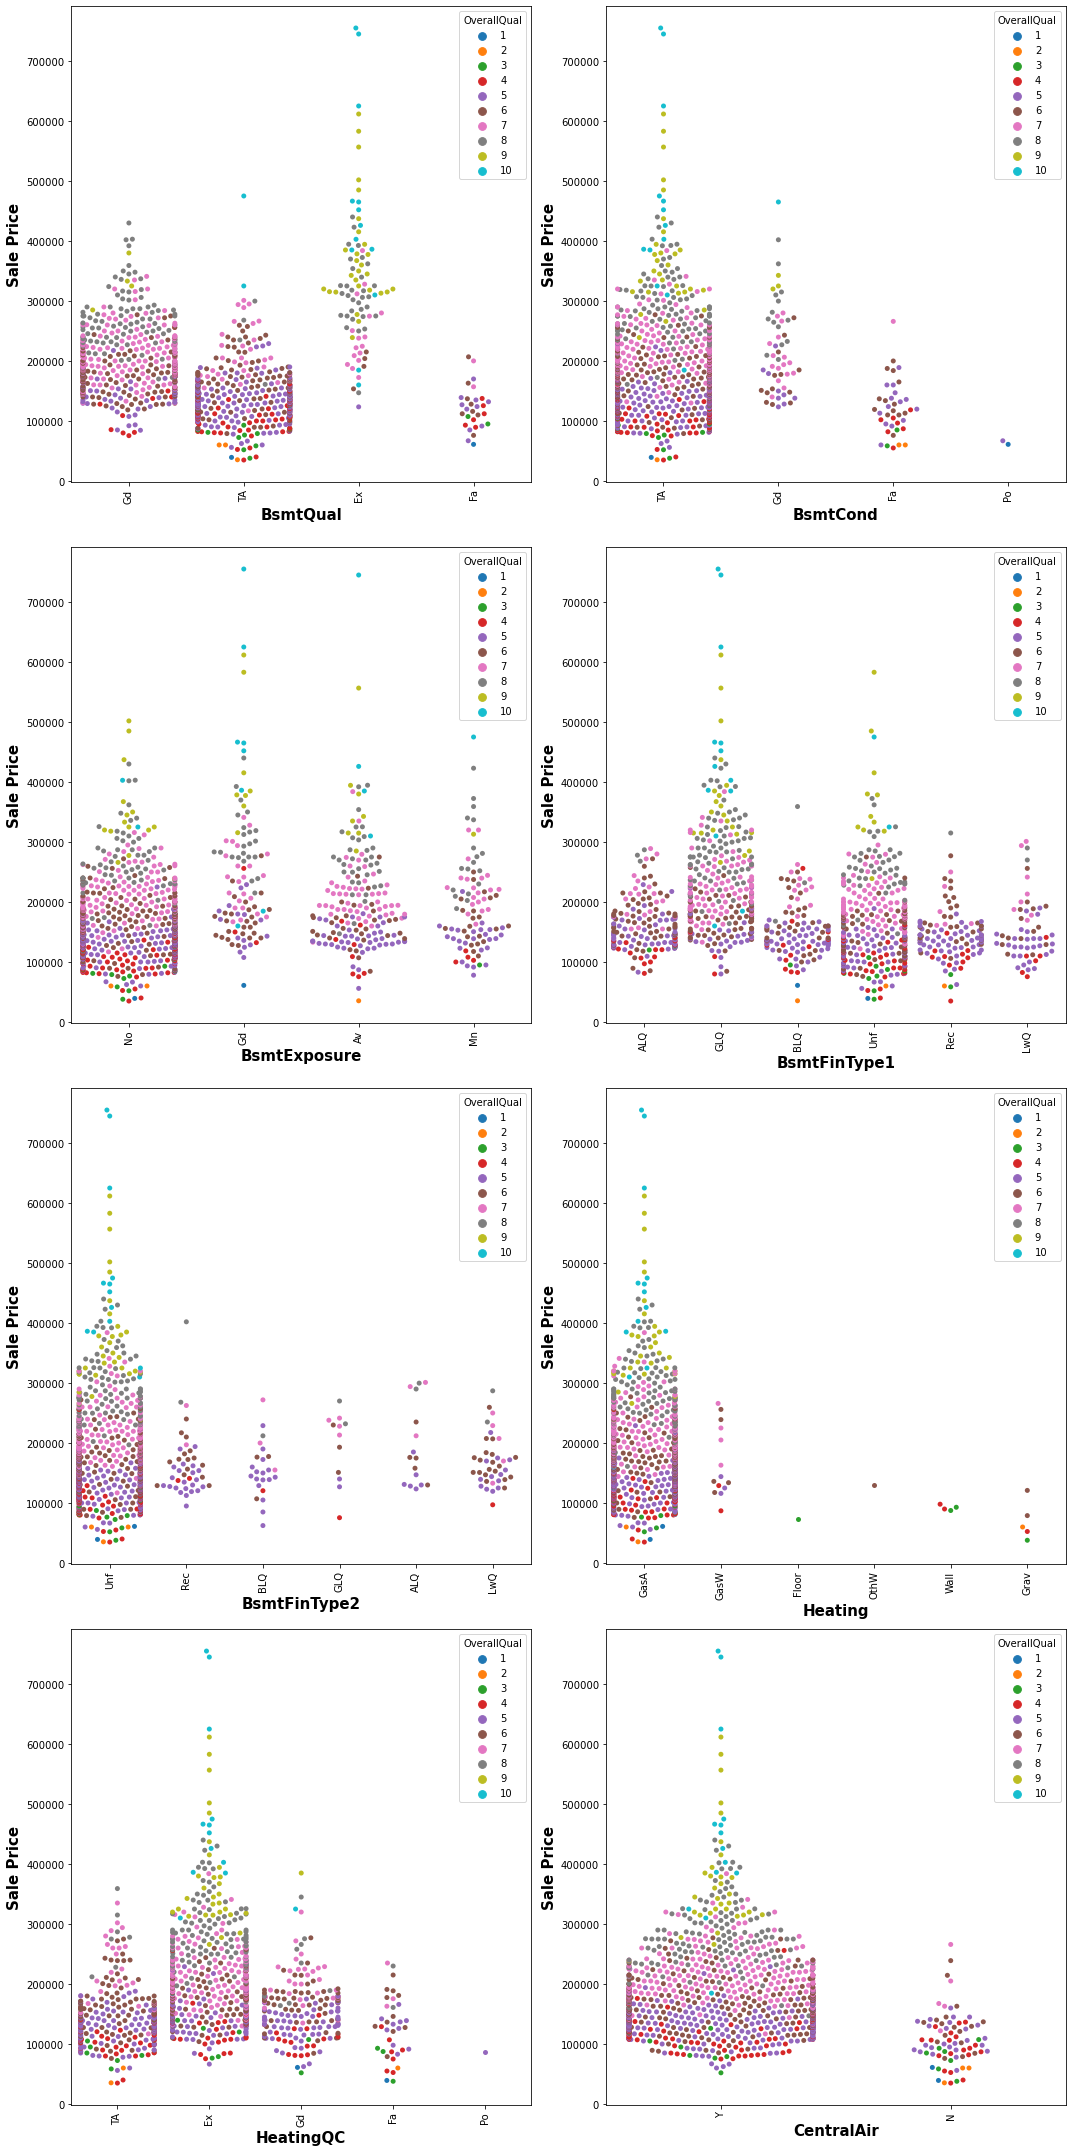

In [91]:
plt.figure(figsize=(15,30))
pltno =1
for i in set2:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        sns.swarmplot(x= train[i], y = train['SalePrice'], hue= train["OverallQual"])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
        plt.xticks(rotation=90)
    pltno+=1 
plt.tight_layout()
plt.show()

### Observations:
1.It is very obvious that Execellent type is much costlier than other types of height of the basement, Heating quality and condition.

2.Central air conditioned housing proper is much costlier than non AC.

3.For maximum case, the Type of heating is Gas forced warm air furnace and it is the costlier type among rest of them.

In [92]:
set3= ['Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType','SaleCondition']

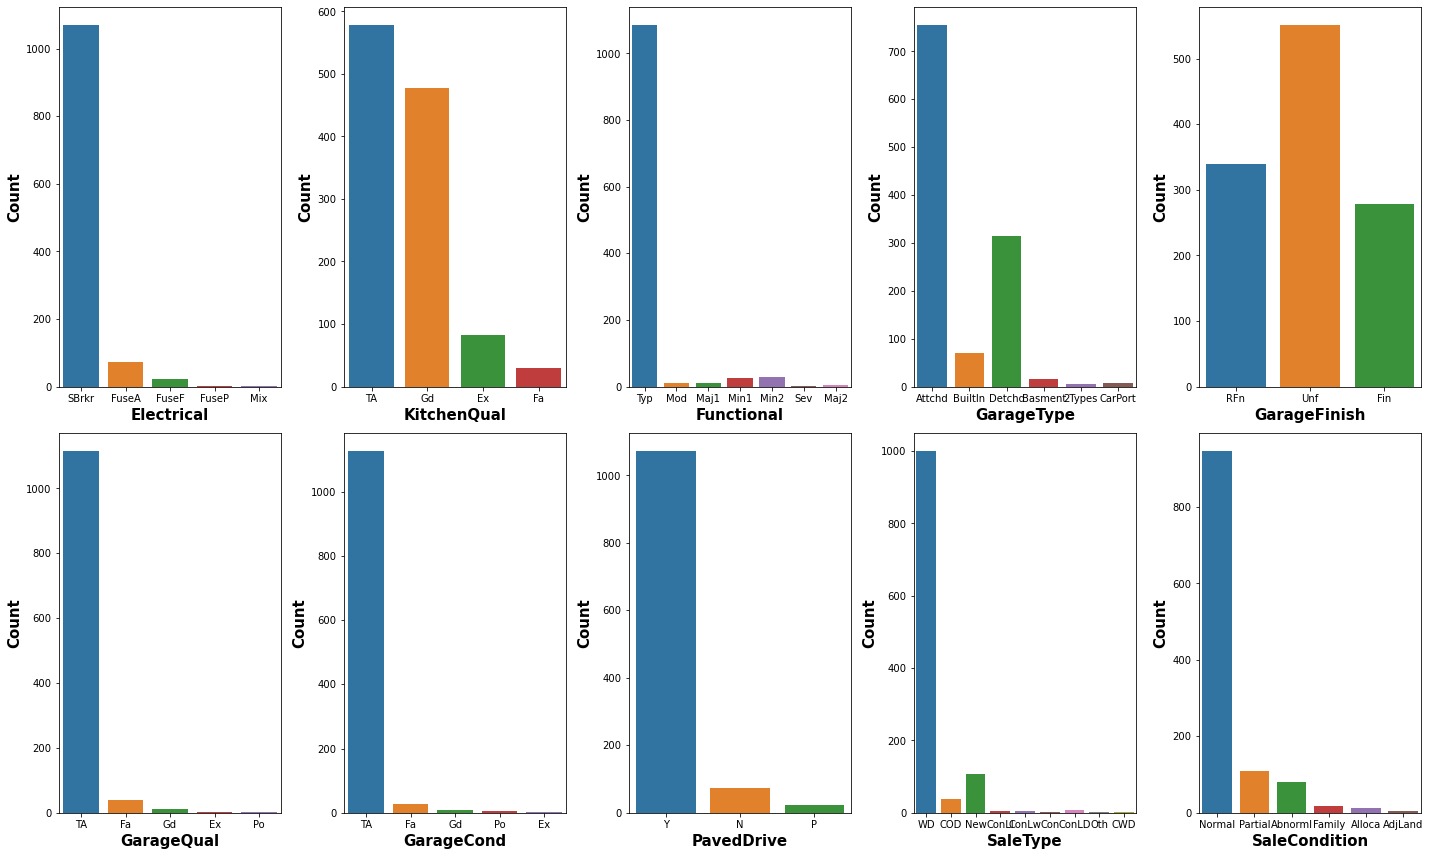

In [93]:
plt.figure(figsize=(20,12))
pltno =1
for i in set3:
    if pltno <=10:
        ax = plt.subplot(2,5,pltno)
        sns.countplot(train[i])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Count', fontsize=15,fontweight ='bold' )
    pltno+=1 
plt.tight_layout()
plt.show()


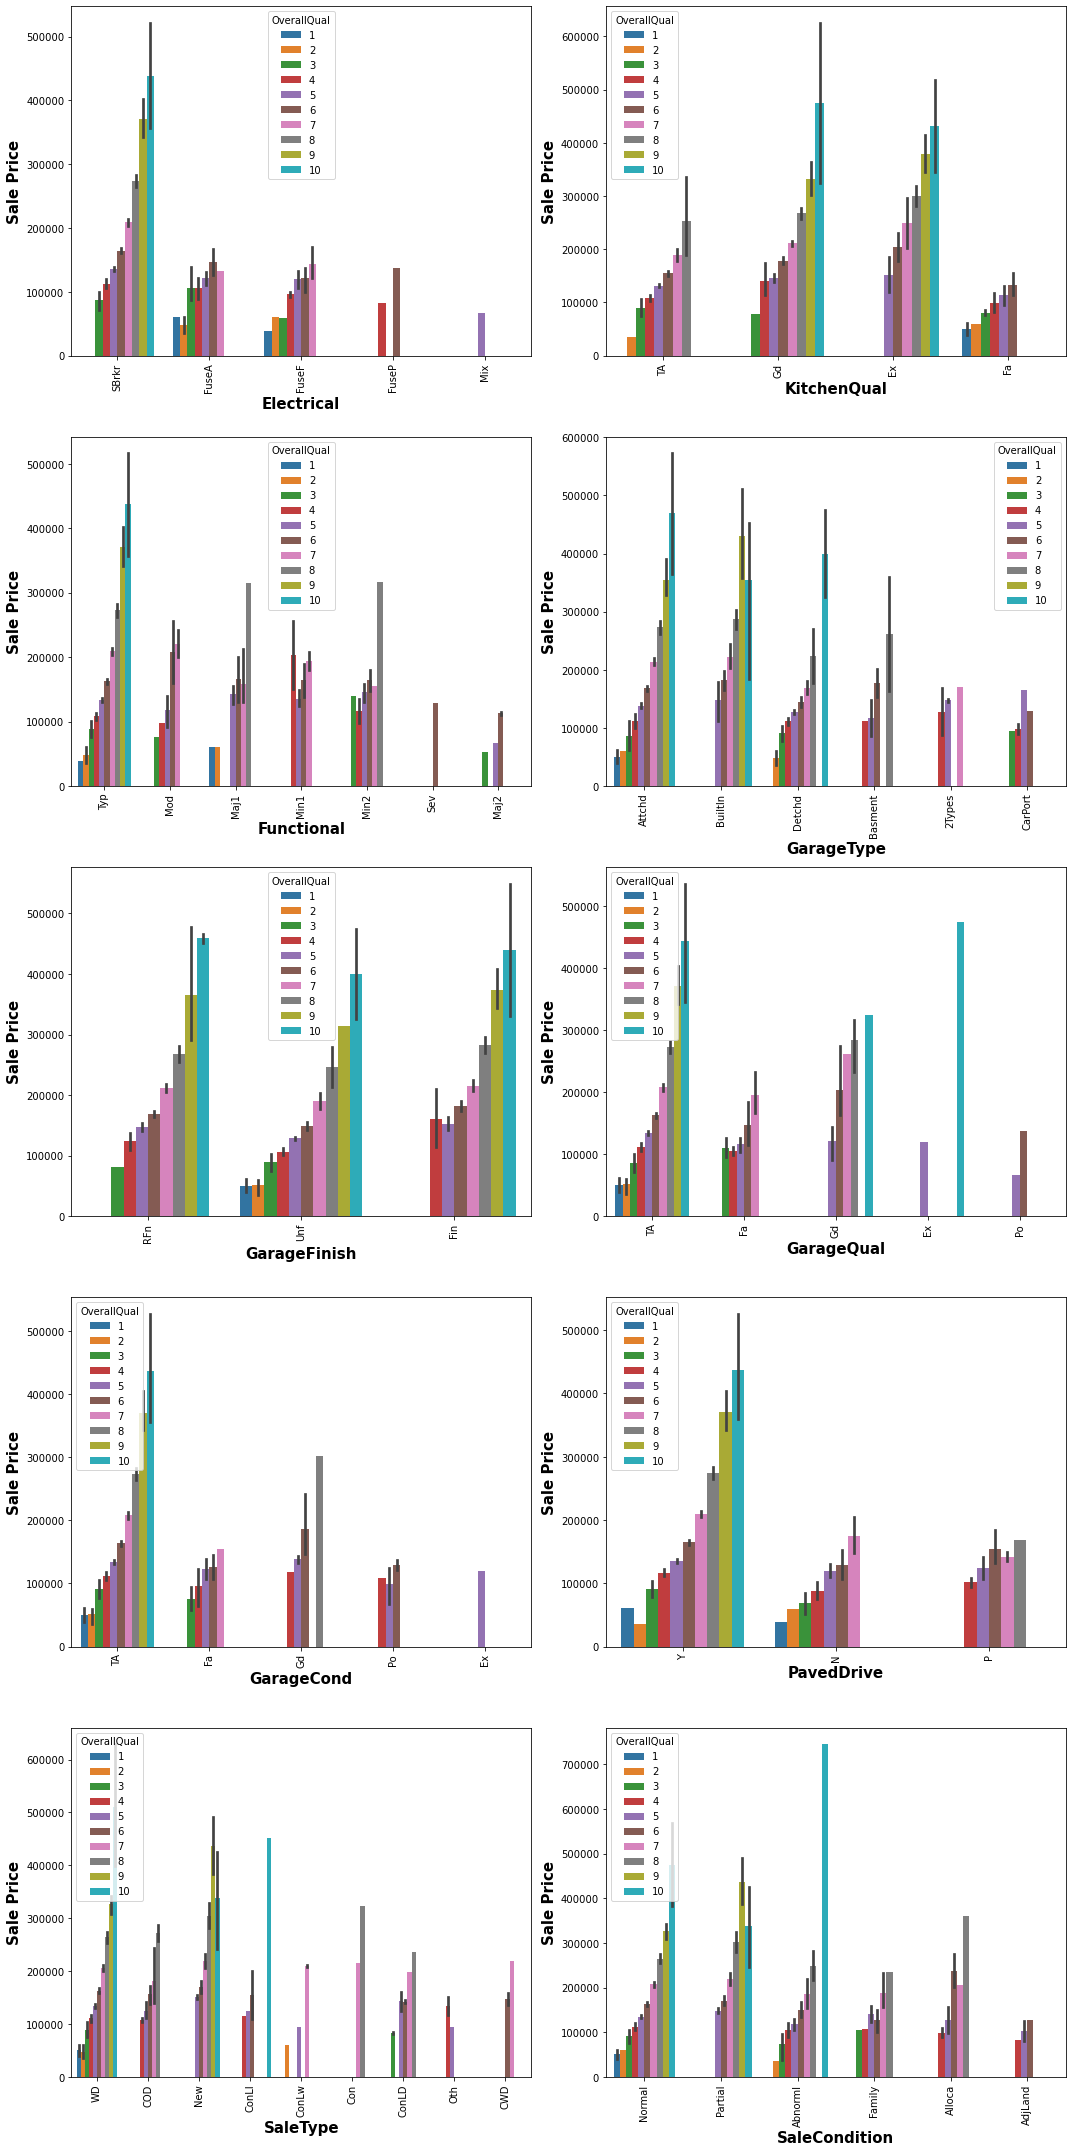

In [94]:
plt.figure(figsize=(15,30))
pltno =1
for i in set3:
    if pltno <=10:
        ax = plt.subplot(5,2,pltno)
        sns.barplot(x= train[i], y = train['SalePrice'], hue= train["OverallQual"])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
        plt.xticks(rotation=90)
    pltno+=1 
plt.tight_layout()
plt.show()

### Observations:

### Electrical: Electrical system

   SBrkr	Standard Circuit Breakers & Romex
   
   FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
   
   FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
   
   FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
   
   Mix	Mixed


### KitchenQual: Kitchen quality

   Ex	Excellent
   
   Gd	Good
   
   TA	Typical/Average
   
   Fa	Fair
   
   Po	Poor

### Functional: Home functionality (Assume typical unless deductions are warranted)

   Typ	Typical Functionality
   
   Min1	Minor Deductions 1
   
   Min2	Minor Deductions 2
   
   Mod	Moderate Deductions
   
   Maj1	Major Deductions 1
   
   Maj2	Major Deductions 2
   
   Sev	Severely Damaged
   
   Sal	Salvage only

### GarageType: Garage location 2Types More than one type of garage Attchd Attached to home Basment Basement Garage BuiltIn Built-In (Garage part of house - typically has room above garage) CarPort Car Port Detchd Detached from home NA No Garage

### GarageFinish: Interior finish of the garage

   Fin	Finished
   
   RFn	Rough Finished	
   
   Unf	Unfinished
   
   NA	No Garage

### GarageQual: Garage quality

   Ex	Excellent
   
   Gd	Good
   
   TA	Typical/Average
   
   Fa	Fair
   
   Po	Poor
   
   NA	No Garage

### GarageCond: Garage condition

   Ex	Excellent
   
   Gd	Good
   
   TA	Typical/Average
   
   Fa	Fair
   
   Po	Poor
   
   NA	No Garage       

### PavedDrive: Paved driveway

   Y	Paved 
   
   P	Partial Pavement
   
   N	Dirt/Gravel

### SaleType: Type of sale WD Warranty Deed - Conventional CWD Warranty Deed - Cash VWD Warranty Deed - VA Loan New Home just constructed and sold COD Court Officer Deed/Estate Con Contract 15% Down payment regular terms ConLw Contract Low Down payment and low interest ConLI Contract Low Interest ConLD Contract Low Down Oth Other SaleCondition: Condition of sale

   Normal	Normal Sale
   
   Abnorml	Abnormal Sale -  trade, foreclosure, short sale
   
   AdjLand	Adjoining Land Purchase
   
   Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
   
   Family	Sale between family members
   
   Partial	Home was not completed when last assessed (associated with New Homes)       

1.Max type of Electrical used in house is Standard Circuit Breakers & Romex and also it is most costly.

2.Max type of KitchenQual used in house is Average and Good. Also it is avg in term of price.

3.Around 95% Home functionality (Assume typical unless deductions are warranted) of the house is Typical Functionality.

4.Above 700 house has attached Garage and it is more convenient to use.

5.Most of the garage is unfinished.
6.Most of the case the quality of garage and Garage condition is Typical/Average.

7.Maximum case, property sale type is Warranty Deed - Conventional and sale condition is Normal Sale. That is the property just constructed and sold category are exceptionally much costlier than any one else.

8.All loan based sale are below 300000.

9.The Partial category- Home was not completed when last assessed (associated with New Homes) is much costlier than rest.

### For 'YearBuilt_age', 'YearRemodAdd_age', 'YrSold_age', 'GarageYrBlt_age':

In [95]:
set4= ['YearBuilt_age', 'YearRemodAdd_age',
       'YrSold_age', 'GarageYrBlt_age']

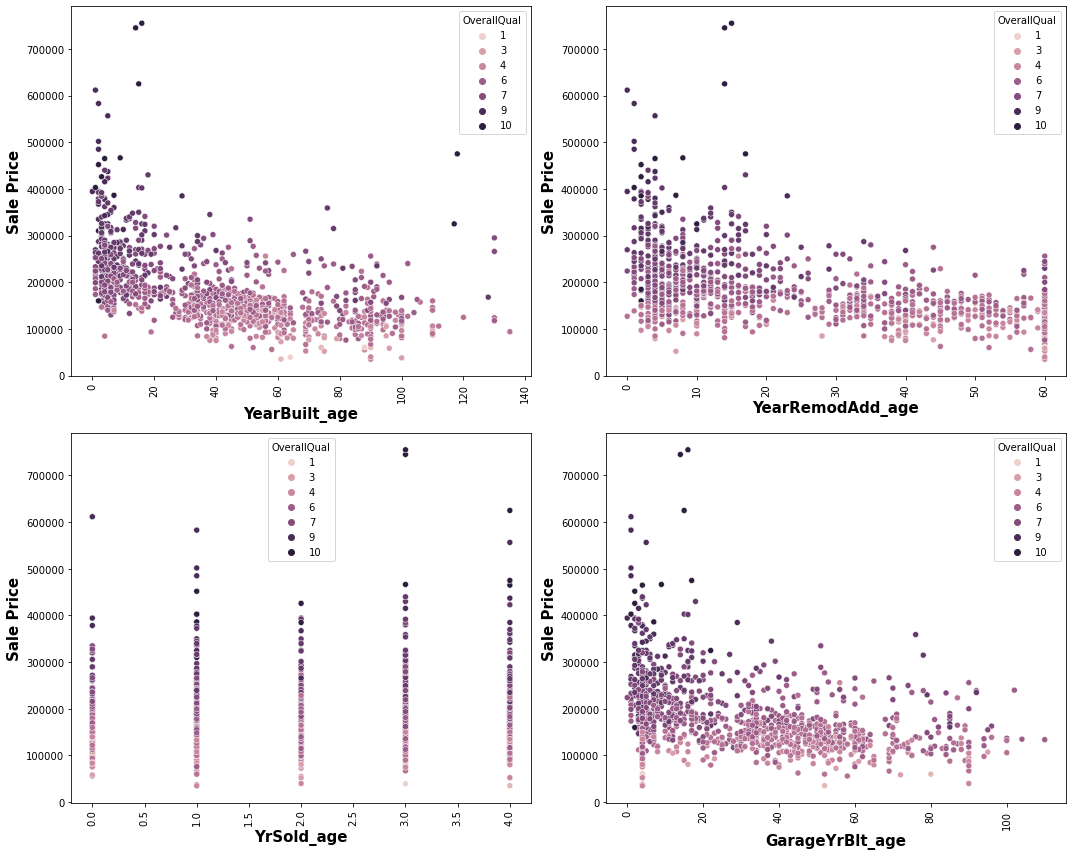

In [96]:
plt.figure(figsize=(15,12))
pltno =1
for i in set4:
    if pltno <=4:
        ax = plt.subplot(2,2,pltno)
        sns.scatterplot(x= train[i], y = train['SalePrice'], hue= train["OverallQual"])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
        plt.xticks(rotation=90)
    pltno+=1 
plt.tight_layout()
plt.show()

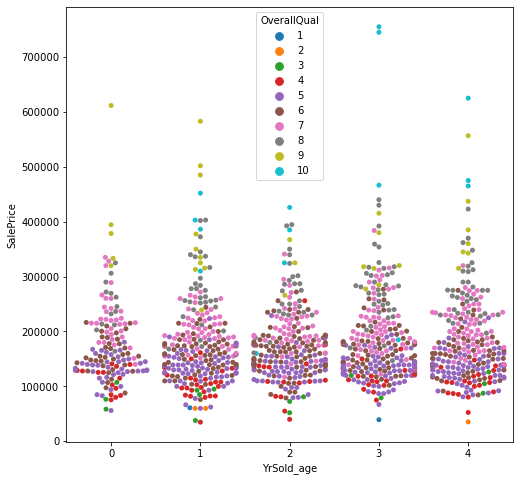

In [97]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=train['YrSold_age'], y=train['SalePrice'], hue= train["OverallQual"])
plt.show()

### Observations:
The selling price of new property is higher than old one.
10 years after Remodelling the properties , the price start decreasing.
The selling price of new garage is also higher than old one.

### For Target variable SalePrice:

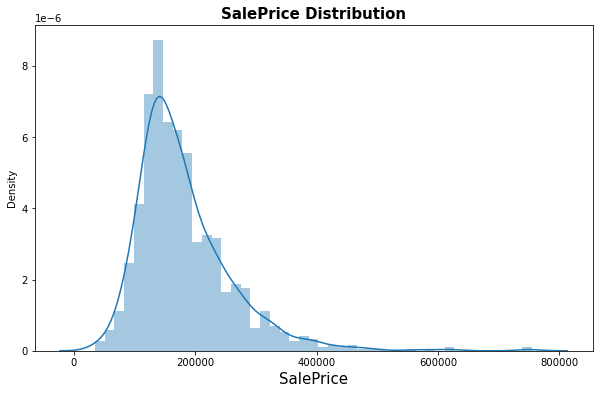

In [98]:
plt.subplots(figsize=(10,6))
sns.distplot(train.SalePrice)
plt.title('SalePrice Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('SalePrice',fontsize=15)
plt.show()

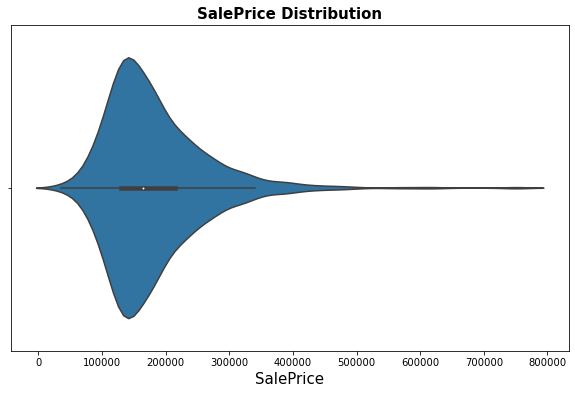

In [99]:
plt.subplots(figsize=(10,6))
sns.violinplot(train.SalePrice, data= train)
plt.title('SalePrice Distribution',fontsize=15,fontweight ='bold')
plt.xlabel('SalePrice',fontsize=15)
plt.show()


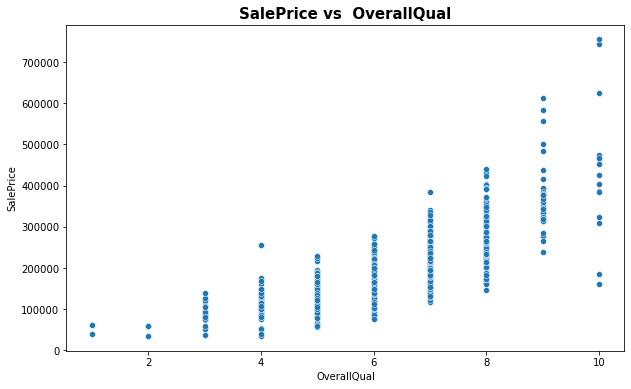

In [100]:
plt.subplots(figsize=(10,6))
sns.scatterplot(y= train.SalePrice, x= train["OverallQual"])
plt.title('SalePrice vs  OverallQual',fontsize=15,fontweight ='bold')
plt.show()

### Observation:
Avg SalePrice is 100000 to 300000
As OverallQual increased, SalePrice is also increased

### For 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GrLivArea','TotalBsmtSF', 'GarageArea', 'PoolArea':

In [101]:
set5= ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','GrLivArea','TotalBsmtSF', 'GarageArea', 'PoolArea', 
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']

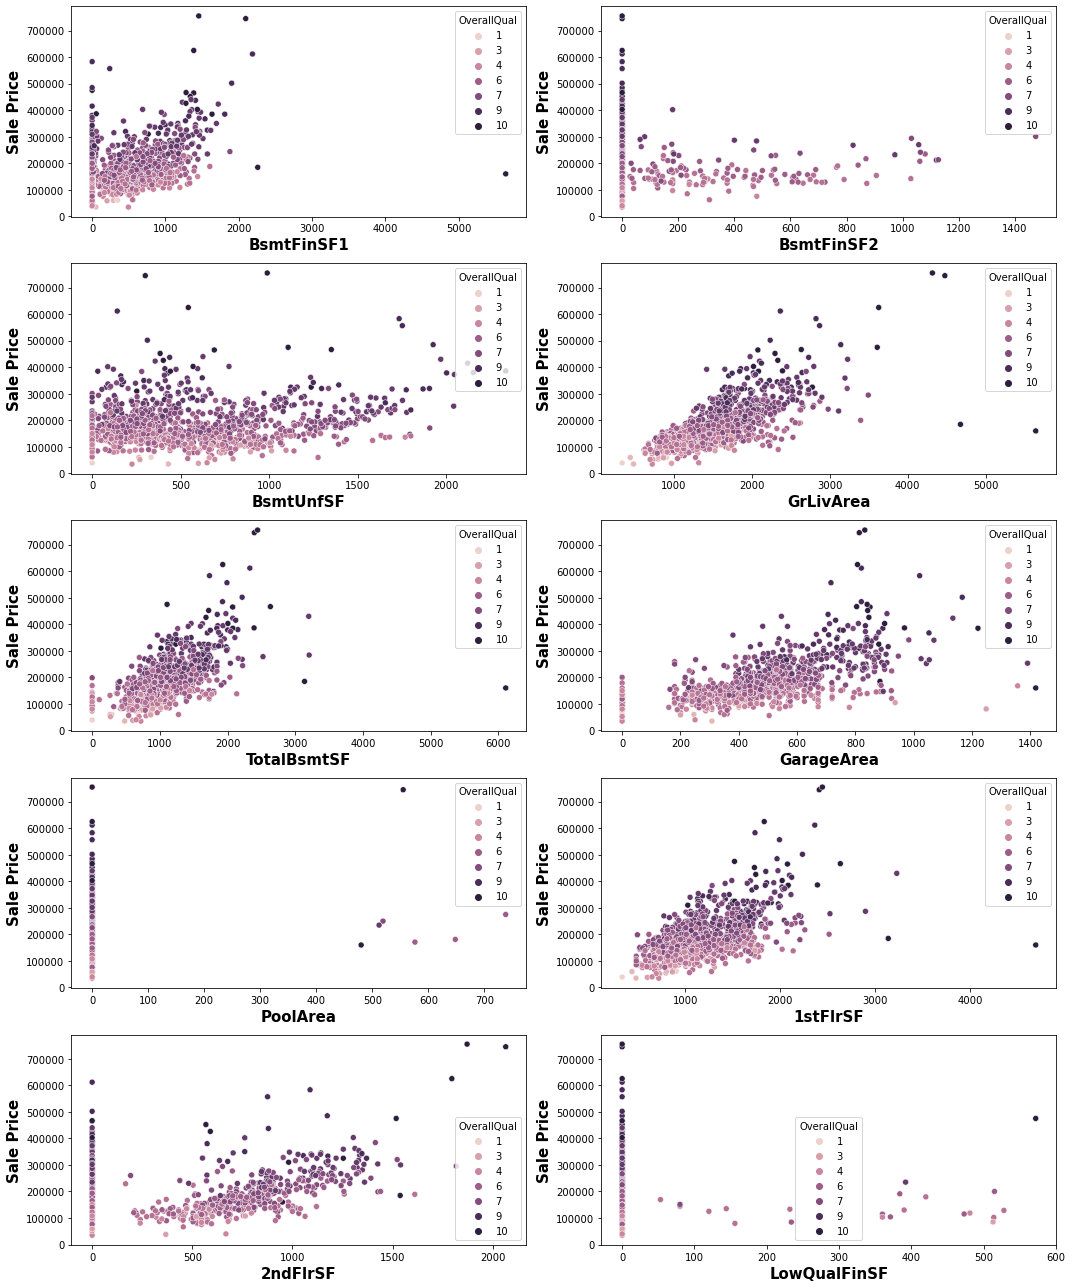

In [102]:
plt.figure(figsize=(15,18))
pltno =1
for i in set5:
    if pltno <=10:
        ax = plt.subplot(5,2,pltno)
        sns.scatterplot(x= train[i], y = train['SalePrice'], hue= train["OverallQual"])
        plt.xlabel(i,fontsize=15,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize=15,fontweight ='bold')
    pltno+=1 
plt.tight_layout()
plt.show()

### Observations:
BsmtFinSF1: Type 1 finished square feet

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

GrLivArea: Above grade (ground) living area square feet

TotalBsmtSF: Total square feet of basement area

GarageArea: Size of garage in square feet

PoolArea: Pool area in square feet

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

1.As total floor area increases the sale price also get increases corresponding the overall quality of House.

2.As Basement Quality increase in relation to it sale Price increases.

3.As total garage area increases the sale price also get increases corresponding the overall quality of House.

4.Here interestingly TotalBsmtSF is sum of BsmtFinSF1,BsmtFinSF2 and BsmtUnfSF. Let's drop those three.

5.Also GrLivArea is sum of '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'. Let's drop those three also.

In [103]:
train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

In [104]:
train.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'],axis=1,inplace=True)

### Observations:
Drop all unnecessary columns.

## Preprocessing of test data:

### Checking Null:

In [105]:
null_val= test.isna().sum().any()
null_val

True

In [106]:
pd.set_option('display.max_rows',None) 
null_val= test.isna().sum().sort_values(ascending = False)
null_val_per =(null_val/test.shape[0])*100
l= [null_val, null_val_per]
ll= pd.concat(l, axis =1, keys =['Null Values', 'Null Values percentage']).sort_values('Null Values')

print("missing value details \n\n", ll)

missing value details 

                Null Values  Null Values percentage
PoolArea                 0                0.000000
LandContour              0                0.000000
Utilities                0                0.000000
1stFlrSF                 0                0.000000
LotConfig                0                0.000000
Neighborhood             0                0.000000
Condition1               0                0.000000
Condition2               0                0.000000
LotShape                 0                0.000000
BldgType                 0                0.000000
OverallQual              0                0.000000
LandSlope                0                0.000000
2ndFlrSF                 0                0.000000
HeatingQC                0                0.000000
GrLivArea                0                0.000000
SaleType                 0                0.000000
YrSold                   0                0.000000
HouseStyle               0                0.000000
MoSold

In [107]:
test.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath 

In [108]:
# droping the 5 columns with high missing value percentage

test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

As train dataset drop 'Id','Utilities' from test also

In [109]:
test.drop(['Id','Utilities'],axis=1,inplace=True)

### Missing Value Imputation:
Impute the missing value as earlier training dataset.

In [110]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageYrBlt']= test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])
test['GarageFinish']= test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [111]:
test.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
test.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [112]:
test.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea  

### Observations:
No missing value present.

### Converting years column to age column as train dataset:

In [113]:
test['YearBuilt_age'] = test['YearBuilt'].max() - test['YearBuilt']
test['YearRemodAdd_age'] = test['YearRemodAdd'].max() - test['YearRemodAdd']
test['YrSold_age'] = test['YrSold'].max() - test['YrSold']
test['GarageYrBlt_age'] = test['GarageYrBlt'].max() - test['GarageYrBlt']

# dropping old columns 

test.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

As train data, delete "Condition1", "Condition2" columns

In [114]:
test.drop(["Condition1", "Condition2"], axis=1, inplace= True)

### Data cleaning of train data :
In previous describe methos we can see that there are some features with a min value 0. Let's check it further.

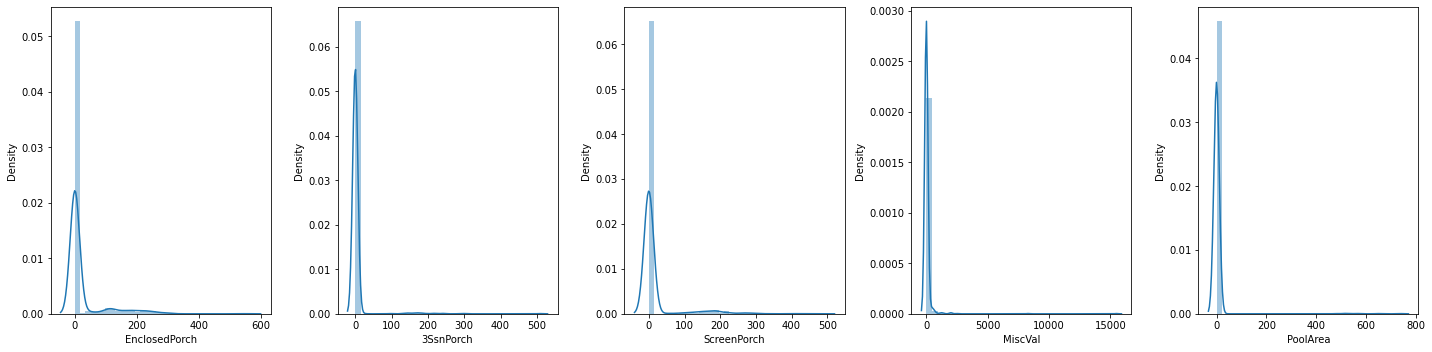

In [115]:
xx=['EnclosedPorch', '3SsnPorch','ScreenPorch', 'MiscVal', 'PoolArea']
plt.figure(figsize=(20,5))
pltno=1
for i in xx:
    if pltno<=5:
        ax= plt.subplot(1,5,pltno)
        sns.distplot(train[i] )
        plt.xlabel(i)
    pltno+=1
plt.tight_layout()
plt.show()

### Observations:
All of the above 5 features has a lot of 0 value and sothat skewness is present in the dataset. Let's remove it.

Let's remove it from train and test both dataset.

In [116]:
train.drop(['EnclosedPorch', '3SsnPorch','ScreenPorch', 'MiscVal', 'PoolArea'],axis=1,inplace=True)
test.drop(['EnclosedPorch', '3SsnPorch','ScreenPorch', 'MiscVal', 'PoolArea'],axis=1,inplace=True)

## Correlation:

In [117]:
train.corr().T

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass          1.000000    -0.336234 -0.124151     0.070462    -0.056978   
LotFrontage        -0.336234     1.000000  0.296790     0.229981    -0.047851   
LotArea            -0.124151     0.296790  1.000000     0.107188     0.017513   
OverallQual         0.070462     0.229981  0.107188     1.000000    -0.083167   
OverallCond        -0.056978    -0.047851  0.017513    -0.083167     1.000000   
MasVnrArea          0.028215     0.188273  0.120192     0.403985    -0.135133   
TotalBsmtSF        -0.214042     0.356180  0.259733     0.528285    -0.162481   
GrLivArea           0.086448     0.374000  0.281360     0.599700    -0.065006   
BsmtFullBath        0.004556     0.092807  0.142387     0.101732    -0.039680   
BsmtHalfBath        0.008207     0.001375  0.059282    -0.030702     0.091016   
FullBath            0.140807     0.171842  0.123197     0.548824    -0.171931   
HalfBath            0.168423     0.047149  0.007271     0.296134    -0.052125   
BedroomAbvGr       -0.013283     0.236946  0.117351     0.099639     0.028393   
KitchenAbvGr        0.283506    -0.002082 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd        0.051179     0.318941  0.184546     0.432579    -0.039952   
Fireplaces         -0.035792     0.228494  0.285983     0.390067    -0.013632   
GarageCars         -0.027639     0.260224  0.158313     0.596322    -0.161996   
GarageArea         -0.092408     0.322750  0.195162     0.566782    -0.126021   
WoodDeckSF         -0.022609     0.087267  0.216720     0.227137     0.012290   
OpenPorchSF         0.017468     0.151044  0.093080     0.341030    -0.024899   
MoSold             -0.016015     0.022579  0.015141     0.090638     0.005519   
SalePrice          -0.060775     0.323851  0.249499     0.789185    -0.065642   
YearBuilt_age      -0.023988    -0.112000 -0.005506    -0.575800     0.377731   
YearRemodAdd_age   -0.056618    -0.089513 -0.027228    -0.555945    -0.080669   
YrSold_age          0.038595     0.004162  0.035399     0.048759    -0.055517   
GarageYrBlt_age    -0.093390    -0.028295  0.054091    -0.427205     0.303182   

                  MasVnrArea  TotalBsmtSF  GrLivArea  BsmtFullBath  \
MSSubClass          0.028215    -0.214042   0.086448      0.004556   
LotFrontage         0.188273     0.356180   0.374000      0.092807   
LotArea             0.120192     0.259733   0.281360      0.142387   
OverallQual         0.403985     0.528285   0.599700      0.101732   
OverallCond        -0.135133    -0.162481  -0.065006     -0.039680   
MasVnrArea          1.000000     0.362330   0.384386      0.084498   
TotalBsmtSF         0.362330     1.000000   0.461067      0.296654   
GrLivArea           0.384386     0.461067   1.000000      0.036206   
BsmtFullBath        0.084498     0.296654   0.036206      1.000000   
BsmtHalfBath        0.014974     0.009657  -0.013145     -0.150317   
FullBath            0.264357     0.311120   0.626275     -0.070138   
HalfBath            0.197831    -0.037014   0.403630     -0.020117   
BedroomAbvGr        0.091339     0.036237   0.509273     -0.149870   
KitchenAbvGr       -0.039438    -0.065410   0.097929     -0.034575   
TotRmsAbvGrd        0.277737     0.273895   0.821845     -0.055266   
Fireplaces          0.241040     0.328241   0.464782      0.134348   
GarageCars          0.340100     0.423592   0.455707      0.105895   
GarageArea          0.363537     0.492980   0.459261      0.166060   
WoodDeckSF          0.152083     0.234848   0.242525      0.161772   
OpenPorchSF         0.127876     0.249284   0.368318      0.060848   
MoSold              0.012707     0.032920   0.065385     -0.012877   
SalePrice           0.460535     0.595042   0.707300      0.212924   
YearBuilt_age      -0.318562    -0.386265  -0.198644     -0.164983   
YearRemodAdd_age   -0.178583    -0.280720  -0.295048     -0.104643   
YrSold_age          0.013220     0.030448   0.056401     -0.060557   
GarageYrBl

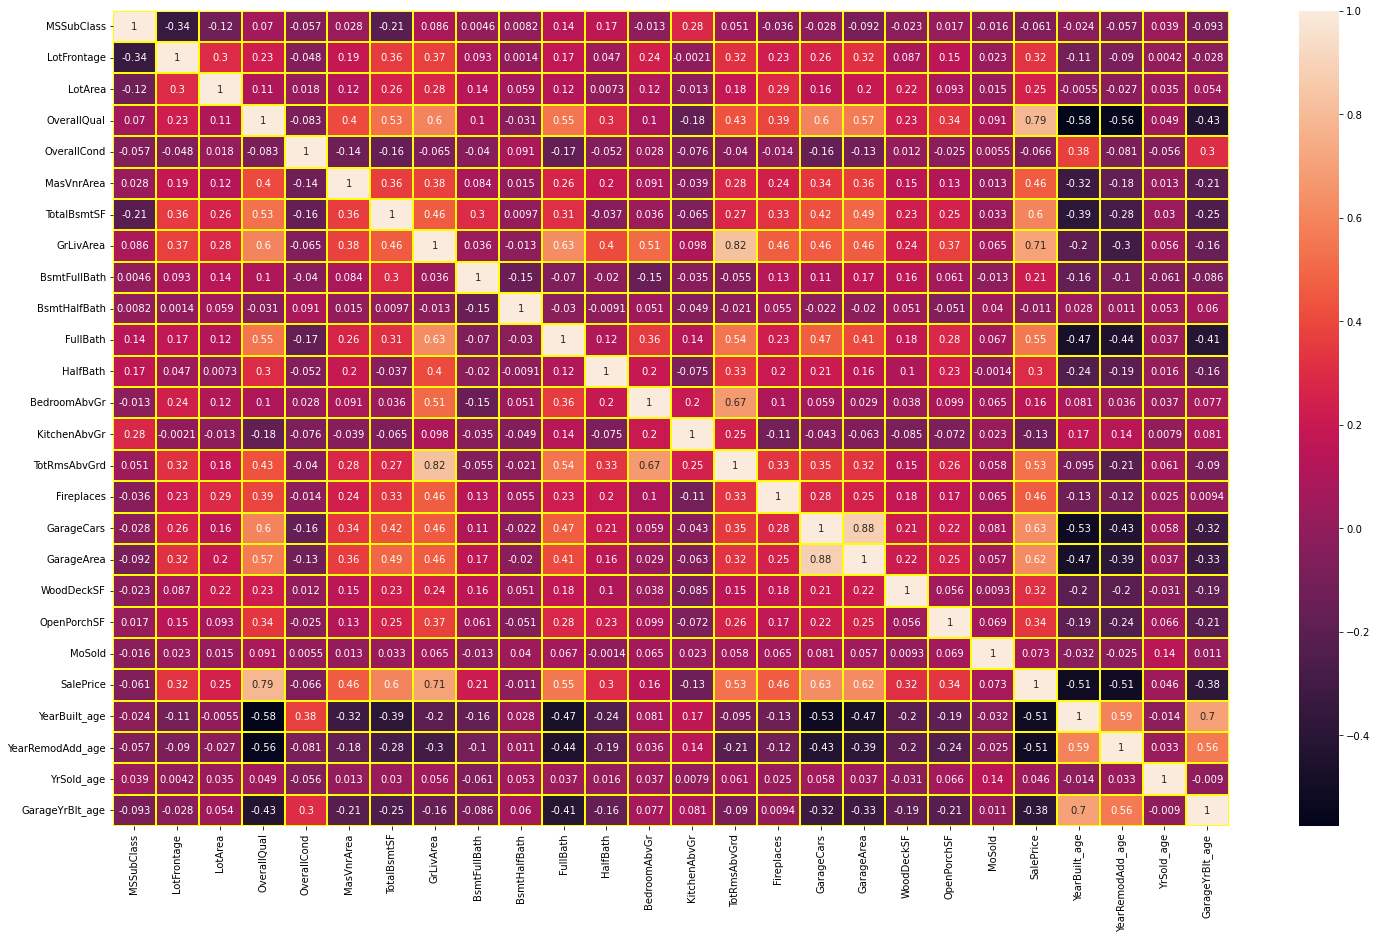

In [118]:
plt.subplots(figsize=(25,15))
sns.heatmap(train.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

### Correlation of Other features with SalePrice(target variable):

<AxesSubplot:title={'center':'feature vs SalePrice corr'}>

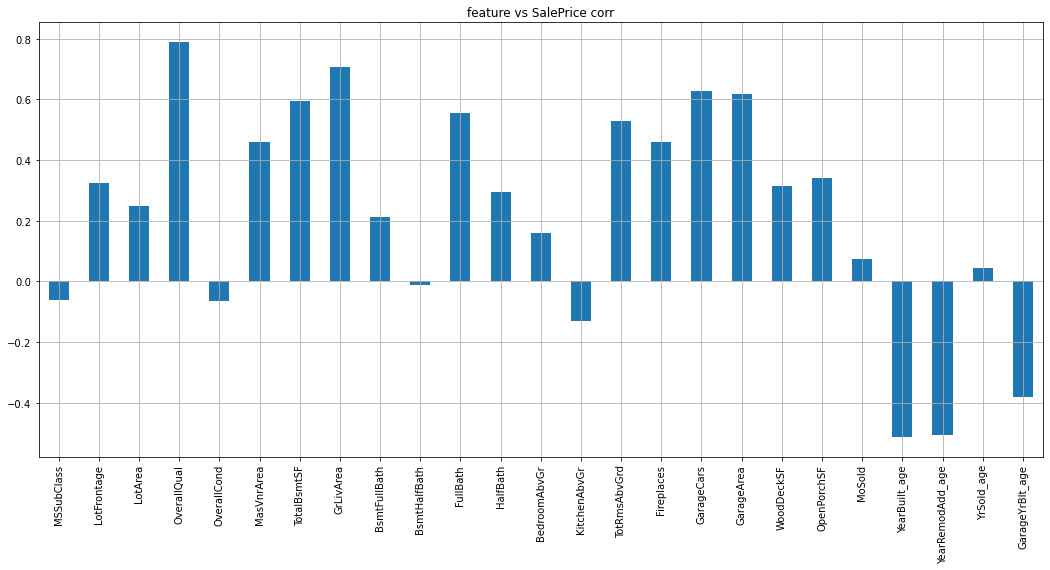

In [119]:
train.drop("SalePrice",axis=1).corrwith(train["SalePrice"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs SalePrice corr')

### Observations:
Overall quality and total ground area is highly correlated with target variable sales.
All the features are correlated with target

### Outlier Detection of training data:

In [120]:
# Lets sort Columns by their datatype

train.columns.to_series().groupby(train.dtypes).groups

{int64: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'YearBuilt_age', 'YearRemodAdd_age', 'YrSold_age'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt_age'], object: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']}

### Dividing numerical & categorical features

In [121]:
num_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea',
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                'MoSold', 'SalePrice', 'YearBuilt_age', 'YearRemodAdd_age', 'YrSold_age','LotFrontage',
                'MasVnrArea', 'GarageYrBlt_age' ]

cat_features= ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
               'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
               'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 
               'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

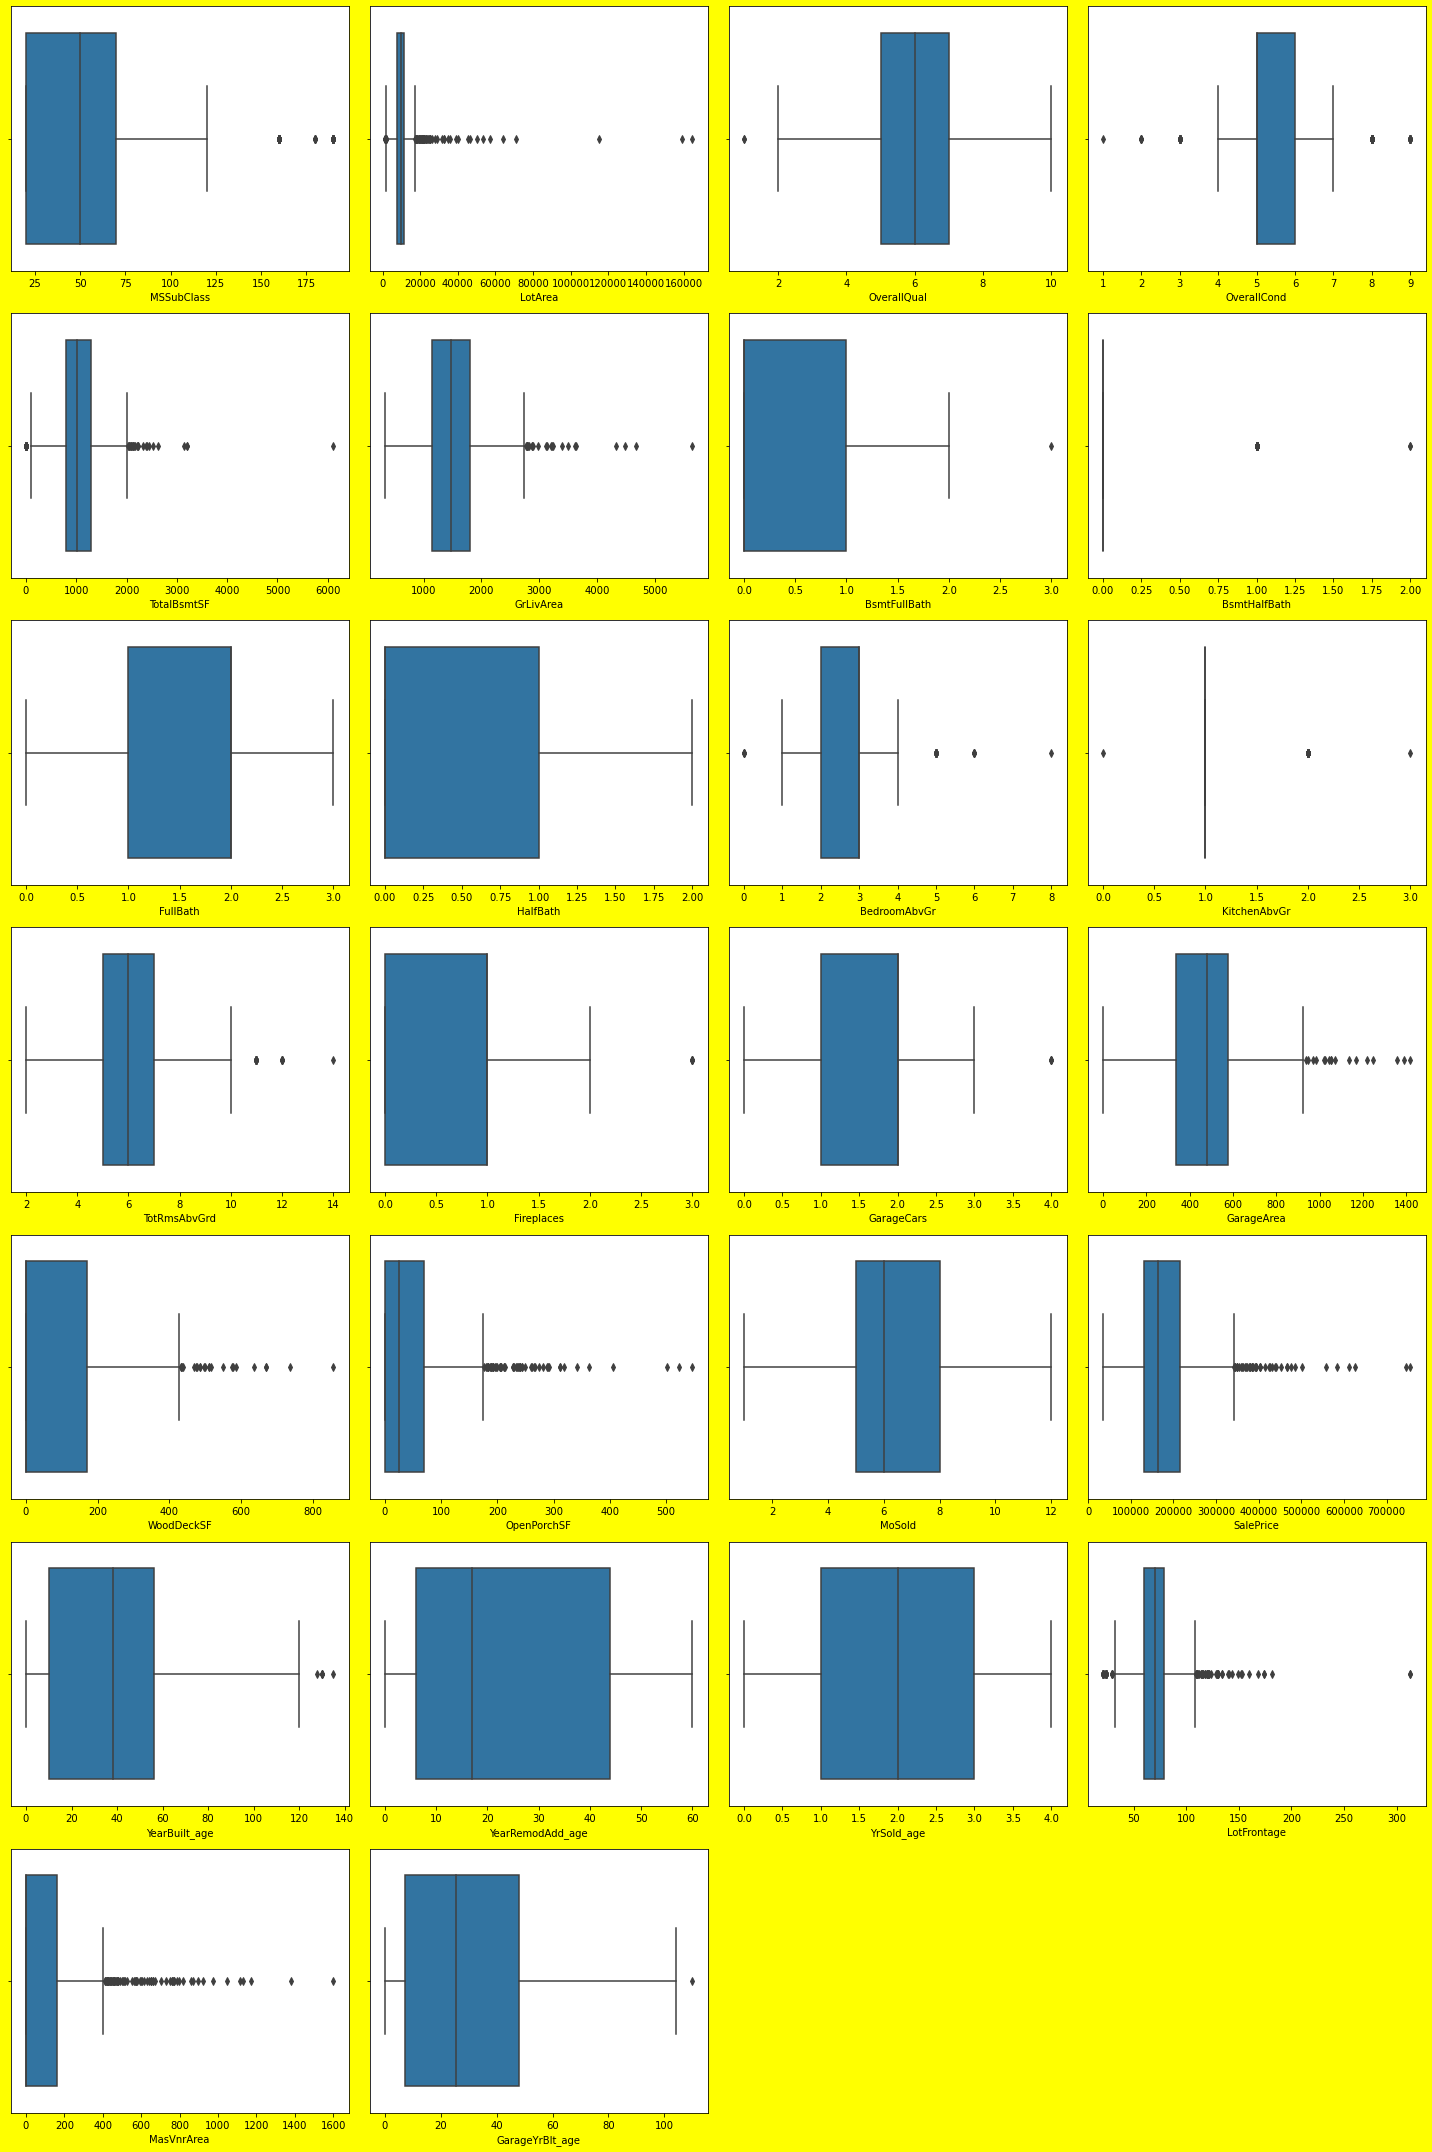

In [122]:
plt.figure(figsize=(20,30),facecolor='yellow')
pltno=1
for x in num_features:
    if pltno<=26:
        ax=plt.subplot(7,4,pltno)
        sns.boxplot(train[x])
        plt.xlabel(x)
    pltno+=1
plt.tight_layout()
plt.show()

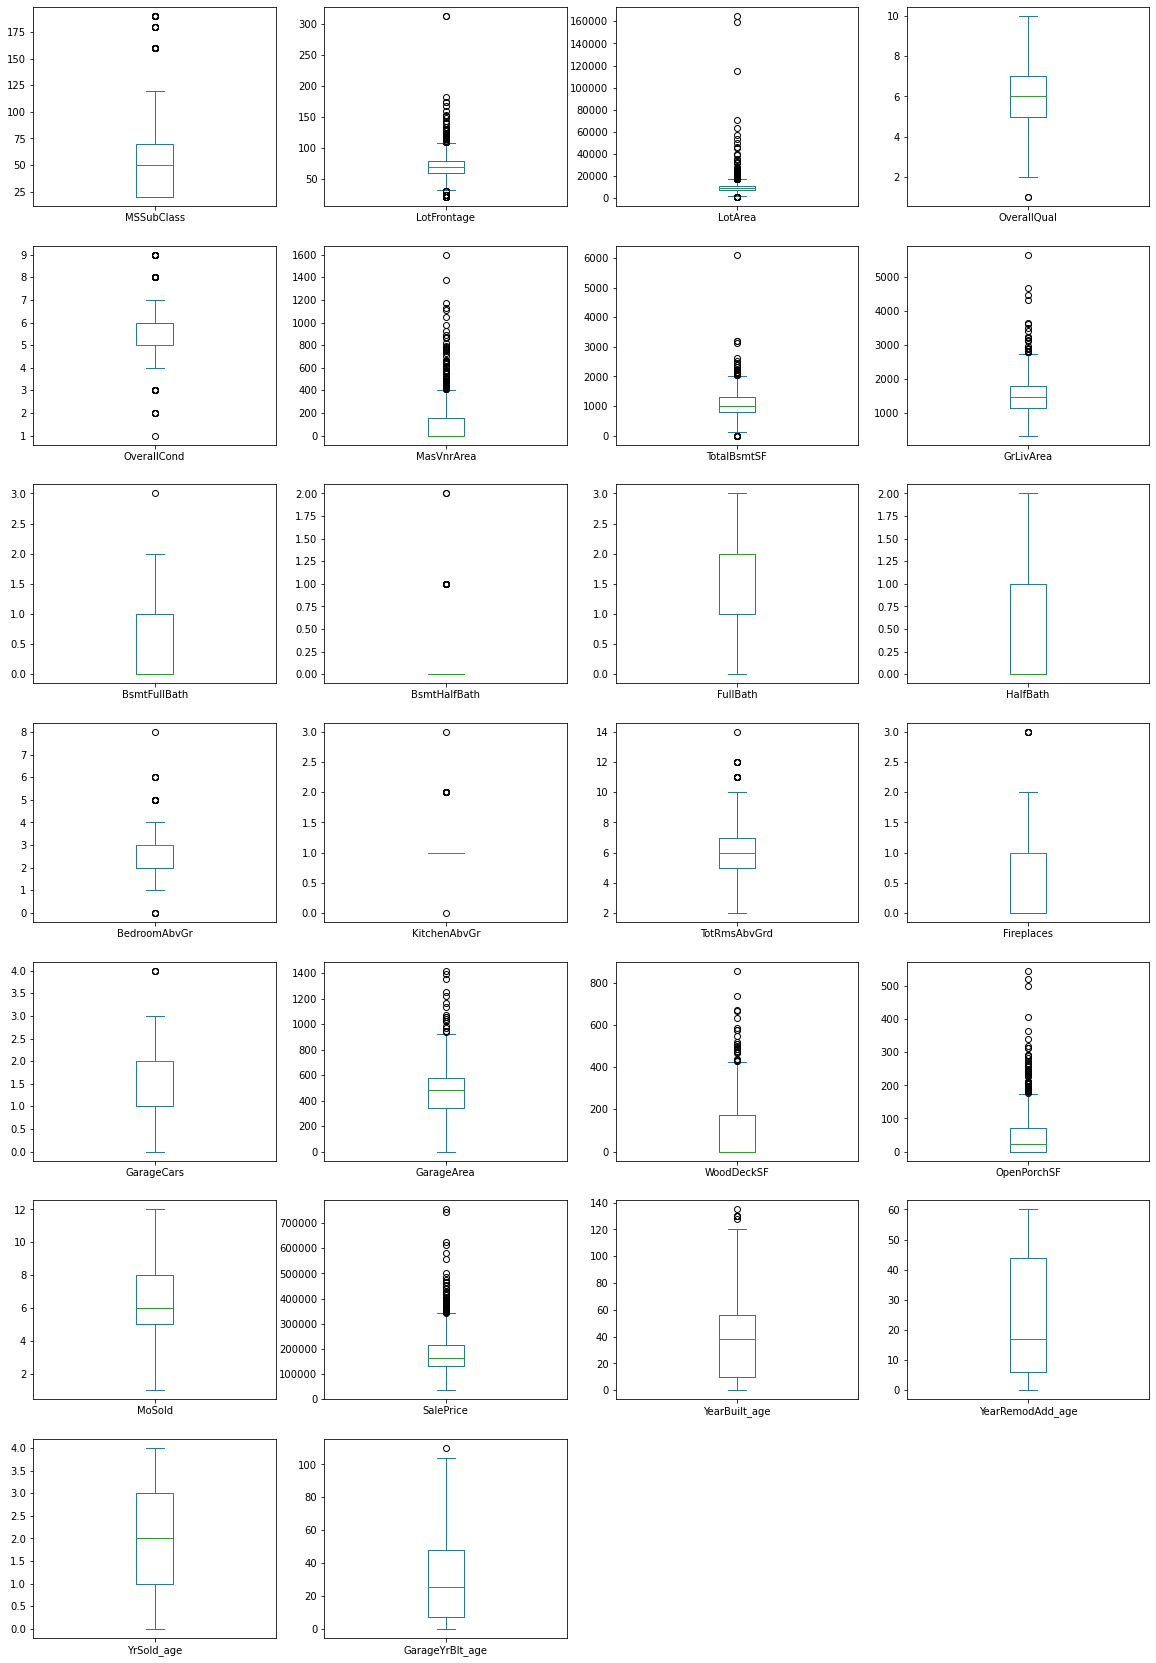

In [123]:
train.plot(kind ='box', subplots =True , layout =(7,4), figsize = (20,30))
plt.show()

### Observations:
A lot of outliers contains in upper side that is the dataset have right skewness.

Let's keep all the data as the deletation of data may cause information loss.

### Skewness:

In [124]:
train.skew().sort_values()

GarageCars          -0.358556
YrSold_age          -0.115765
FullBath             0.057809
OverallQual          0.175082
GarageArea           0.189665
MoSold               0.220979
BedroomAbvGr         0.243855
YearRemodAdd_age     0.495864
YearBuilt_age        0.579204
OverallCond          0.580714
BsmtFullBath         0.627106
TotRmsAbvGrd         0.644657
HalfBath             0.656492
Fireplaces           0.671966
GarageYrBlt_age      0.708074
MSSubClass           1.422019
GrLivArea            1.449952
WoodDeckSF           1.504929
TotalBsmtSF          1.744591
SalePrice            1.953878
OpenPorchSF          2.410840
LotFrontage          2.733440
MasVnrArea           2.835718
BsmtHalfBath         4.264403
KitchenAbvGr         4.365259
LotArea             10.659285
dtype: float64

### Observations:
Skewness is present in the dataset. Let's say for this case, the skewness range is -1 to +1.

Any data have skewness above this level, are skewed.

In [125]:
data= train.copy()

In [126]:
skew_data = ['MSSubClass', 'GrLivArea','WoodDeckSF',
             'TotalBsmtSF','OpenPorchSF', 
             'LotFrontage','MasVnrArea','BsmtHalfBath',
             'KitchenAbvGr','LotArea']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [127]:
data[skew_data] = scaler.fit_transform(data[skew_data].values)
data.head()

MSSubClass MSZoning  LotFrontage   LotArea LotShape LandContour LotConfig  \
0    1.370435       RL     0.057324 -1.213954      IR1         Lvl    Inside   
1   -1.167999       RL     1.125853  1.100521      IR1         Lvl    Inside   
2    0.490047       RL     1.007841  0.158048      IR1         Lvl   CulDSac   
3   -1.167999       RL     1.502999  0.496002      IR1         Lvl    Inside   
4   -1.167999       RL     0.057324  1.196626      IR1         Lvl       FR2   

  LandSlope Neighborhood BldgType  ... WoodDeckSF  OpenPorchSF  MoSold  \
0       Gtl      NPkVill   TwnhsE  ...  -0.959773     1.409990       2   
1       Mod        NAmes     1Fam  ...   0.781991     1.414498      10   
2       Gtl      NoRidge     1Fam  ...   1.043999     1.198911       6   
3       Gtl       NWAmes     1Fam  ...  -0.959773     1.169545       1   
4       Gtl       NWAmes     1Fam  ...   1.135369    -1.061392       6   

  SaleType SaleCondition SalePrice YearBuilt_age YearRemodAdd_age  YrSold_age  \
0       WD        Normal    128000            34               34           3   
1       WD        Normal    268000            40               40           3   
2       WD        Normal    269790            14               13           3   
3      COD        Normal    190000            33               33           0   
4       WD        Normal    215000            33               10           1   

  GarageYrBlt_age  
0            33.0  
1            40.0  
2            13.0  
3            33.0  
4            33.0  

[5 rows x 60 columns]

In [128]:
data.skew().sort_values()

KitchenAbvGr       -2.370593
GarageCars         -0.358556
YrSold_age         -0.115765
OpenPorchSF        -0.002749
GrLivArea          -0.000054
LotArea             0.032509
FullBath            0.057809
MSSubClass          0.064007
WoodDeckSF          0.113026
LotFrontage         0.155904
OverallQual         0.175082
GarageArea          0.189665
MoSold              0.220979
BedroomAbvGr        0.243855
TotalBsmtSF         0.286779
MasVnrArea          0.439526
YearRemodAdd_age    0.495864
YearBuilt_age       0.579204
OverallCond         0.580714
BsmtFullBath        0.627106
TotRmsAbvGrd        0.644657
HalfBath            0.656492
Fireplaces          0.671966
GarageYrBlt_age     0.708074
SalePrice           1.953878
BsmtHalfBath        3.954345
dtype: float64

Overall skewness is removed

### Encoding for Training data:

In [129]:
# Using Label encoder for transforming categorical data of train data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_features:
    data[i] = le.fit_transform(data[i])
data.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
0    1.370435         3     0.057324 -1.213954         0            3   
1   -1.167999         3     1.125853  1.100521         0            3   
2    0.490047         3     1.007841  0.158048         0            3   
3   -1.167999         3     1.502999  0.496002         0            3   
4   -1.167999         3     0.057324  1.196626         0            3   

   LotConfig  LandSlope  Neighborhood  BldgType  ...  WoodDeckSF  OpenPorchSF  \
0          4          0            13         4  ...   -0.959773     1.409990   
1          4          1            12         0  ...    0.781991     1.414498   
2          1          0            15         0  ...    1.043999     1.198911   
3          4          0            14         0  ...   -0.959773     1.169545   
4          2          0            14         0  ...    1.135369    -1.061392   

   MoSold  SaleType  SaleCondition  SalePrice  YearBuilt_age  \
0       2         8              4     128000             34   
1      10         8              4     268000             40   
2       6         8              4     269790             14   
3       1         0              4     190000             33   
4       6         8              4     215000             33   

   YearRemodAdd_age  YrSold_age  GarageYrBlt_age  
0                34           3             33.0  
1                40           3             40.0  
2                13           3             13.0  
3                33           0             33.0  
4                10           1             33.0  

[5 rows x 60 columns]

### Encoding for Test data:

In [130]:
# Using Label encoder for transforming categorical data of test data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_features:
    test[i] = le.fit_transform(test[i])
test.sample(n=5)

MSSubClass  MSZoning  LotFrontage  LotArea Street  LotShape  LandContour  \
7            20         2        107.0    13891   Pave         3            3   
6           180         3         35.0     3675   Pave         3            3   
78           20         2         65.0    13265   Pave         0            3   
85           75         2        102.0    15863   Pave         3            3   
105          90         2         64.0     6979   Pave         3            3   

     LotConfig  LandSlope  Neighborhood  ...  PavedDrive  WoodDeckSF  \
7            4          0            15  ...           2           0   
6            4          0             6  ...           2           0   
78           1          0            10  ...           2         150   
85           0          0            17  ...           2         136   
105          4          0            16  ...           2         264   

     OpenPorchSF  MoSold  SaleType  SaleCondition  YearBuilt_age  \
7            102       1         4              3              2   
6             28       5         5              2              4   
78            59       7         5              2              7   
85            63       8         5              2             89   
105           56       6         5              2             29   

     YearRemodAdd_age  YrSold_age  GarageYrBlt_age  
7                   2           2              3.0  
6                   5           4              5.0  
78                  8           2              8.0  
85                 40           1             40.0  
105                30           0             30.0  

[5 rows x 60 columns]

In [131]:
test["Street"].value_counts()

Pave    290
Grvl      2
Name: Street, dtype: int64

In [132]:
test.drop("Street",axis =1, inplace= True )

### Data Scaling:

#### Standard Scaling of train data:

In [133]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [134]:
# Splitting data in target and dependent feature
x = data.drop(['SalePrice'], axis =1)
y = data['SalePrice']
x_scale = scaler.fit_transform(x)

#### Standard Scaling of test data:

In [135]:
x_scale_test = scaler.fit_transform(test)

### Final predictions using different Classification ML Models for Loan_Status:

#### Find best Random state:

In [136]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_max=0
random_max=0
for i in range(500,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.8816206614832436 on Random_state 654


In [137]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (876, 59)
Training target shape: (876,)
Test feature shape: (292, 59)
Test target shape: (292,)


### Observations:
For random state=654, the accuracy score is best. Lets take this random state for further steps.

## Using LinearRegression()

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=654)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8816206614832436
Mean absolute error: 19209.64887826137
Mean square error: 653721476.9612099
Root mean square error: 25567.977568849867


### Hyperparameter Tuning Using GridSearchCV:

In [139]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [140]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8816206614832436
Mean absolute error: 19209.64887826137
Mean square error: 653721476.9612099
Root mean square error: 25567.977568849867


### Observations:
No such improvement seen after GridSearchCV.

## Using DecisionTreeRegressor():

In [141]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.745689939909426
Mean absolute error: 26137.503424657534
Mean square error: 1404366253.1952055
Root mean square error: 37474.87495903362


### Using GridSearchCV:

In [142]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'min_samples_split' : range(1,5),
    'splitter' : ["best", "random"], 'max_features':["auto", "sqrt", "log2"],
    'min_samples_leaf' : range(1,4)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'absolute_error', 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}


In [143]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7886448503684074
Mean absolute error: 24581.42294520548
Mean square error: 1167158072.61387
Root mean square error: 34163.69524237491


#### Observations:
After using Gridseaech CV, R2 is Slightly improved.

### Using KNeighborsRegressor():

In [144]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0,20):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 37628.976168638976
RMSE value for k=  2 is: 32549.855292536533
RMSE value for k=  3 is: 31283.09745156325
RMSE value for k=  4 is: 29321.651233238288
RMSE value for k=  5 is: 28926.187983851647
RMSE value for k=  6 is: 30048.98909225749
RMSE value for k=  7 is: 29825.33360816275
RMSE value for k=  8 is: 29839.508638396324
RMSE value for k=  9 is: 30123.706156578708
RMSE value for k=  10 is: 29908.52342843617
RMSE value for k=  11 is: 30535.025229221264
RMSE value for k=  12 is: 30977.741378214585
RMSE value for k=  13 is: 30768.931353935055
RMSE value for k=  14 is: 30900.6364985536
RMSE value for k=  15 is: 30969.628049086285
RMSE value for k=  16 is: 31270.41889145918
RMSE value for k=  17 is: 31451.35939398251
RMSE value for k=  18 is: 31446.4875871105
RMSE value for k=  19 is: 31702.72593362678
RMSE value for k=  20 is: 32083.609190845924


In [145]:
min(rmse_val)

28926.187983851647

### For k=5 we get the best RMSE value for KNeighborsRegressor()

In [146]:
knn =KNeighborsRegressor(n_neighbors= 5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8484815342376684
Mean absolute error: 20412.041780821914
Mean square error: 836724351.2771233
Root mean square error: 28926.187983851647


### Using GridSearchCV

In [147]:
param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'leaf_size' : [30,40,25,34],
             'n_neighbors' : [5],'weights': ['uniform', 'distance'], 'p':[1,2,3]}

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [148]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8624254987486822
Mean absolute error: 18860.720302429356
Mean square error: 759722154.871503
Root mean square error: 27563.057792478376


### Observations:
Nothing is improved after GridSearchCV.

## Using RandomForestRegressor():

In [149]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9052118358764278
Mean absolute error: 16412.311609589044
Mean square error: 523444880.04156345
Root mean square error: 22878.917807483016


## Using GridSearchCV:

In [180]:
params = {'n_estimators' : [100,110,80], 'criterion' : ["squared_error", "absolute_error"], 
          'min_samples_split' : [3,2,1], 'min_samples_leaf' : [1,2,3]}

rf_grd = GridSearchCV(rf, param_grid = params)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'squared_error', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [181]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9059183446367712
Mean absolute error: 16082.914802390533
Mean square error: 519543355.02812225
Root mean square error: 22793.493699477538


### Using Support Vector Regression():

In [151]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.10138556204325022
Mean absolute error: 55211.98959111769
Mean square error: 6082137350.52043


In [152]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.10171447791894073
Mean absolute error: 55230.27202043972
Mean square error: 6083953709.479235


In [153]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.05762846109778941
Mean absolute error: 50097.51145626774
Mean square error: 5204020583.120261


### Using GridSearchCV

In [154]:
params = {'gamma':['scale', 'auto'],'C':[1.0,10, 0.5,0.1], 'tol':[0.01,0.001,0.002], 'kernel':['linear']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv= 7)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'tol': 0.01}


In [155]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6319960420727175
Mean absolute error: 27248.79151159608
Mean square error: 2032213508.8611045
Root mean square error: 45080.0788471039


r2 score, RMSE are improved after using svm

### Using GradientBoostingRegressor

In [156]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9221923995580521
Mean absolute error: 14993.640684755468
Mean square error: 429673793.72979087
Root mean square error: 20728.574329407966


### Using GridSearchCV

In [157]:
params = {'loss': ['squared_error', 'absolute_error'], 'n_estimators':[100,150,80],
          'criterion':['friedman_mse', 'squared_error', 'mse'], 'min_samples_leaf':range(1,4),
         'max_features': ['auto', 'sqrt']}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'criterion': 'friedman_mse', 'loss': 'absolute_error', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}


In [158]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9150140991539188
Mean absolute error: 14747.218016219478
Mean square error: 469314234.3764244
Root mean square error: 21663.661610550153


No improvement after GridSearchCV

### Using AdaBoostRegressor

In [159]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8237241724991691
Mean absolute error: 23616.846899088796
Mean square error: 973440937.8380779
Root mean square error: 31200.015029452756


### Using GridSearchCV

In [160]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.001,1,0.5] ,
        'n_estimators':[50,90,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 40}


In [161]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8279570354169965
Mean absolute error: 22760.32399566376
Mean square error: 950065968.5817261
Root mean square error: 30823.14014797529


No improvement after GridSearchCV

### As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is GradientBoostingRegressor().

### Cross Validation

In [163]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , grid_dt_best , grid_knn_best , rf , grid_svr_best , grid_gbdt_best, grid_ada_best]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [0.81653134 0.78024383 0.69227625 0.83681842 0.82179625]

Mean CV Score : 0.7895332202585212

Std deviation : 0.052059393965920624

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(criterion='absolute_error', max_features='auto',
                      min_samples_leaf=3, min_samples_split=4)

 Cross Validation Score :  [0.80468178 0.69201373 0.65154283 0.79647068 0.72236532]

Mean CV Score : 0.7334148712619744

Std deviation : 0.059319786264742665

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(p=1, weights='distance')

 Cross Validation Score :  [0.79289437 0.77175501 0.75799916 0.8455569  0.7814569 ]

Mean CV Score : 0.7899324718159508

Std deviation : 0.030082691786504412

-----------
-----------
Cross Validation Score of : RandomForestRegressor()

 Cross Validation Score :  [0.86577097 0.78676927 0.80819931 0.87814285 0.82888785]

Mean CV Score : 0.8335540484

GradientBoostingRegressor() is the best model with max cv score and min std

In [164]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression
lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha 

1926.8413624973484

In [165]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.8795786186447174


In [166]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha 

0.3751

In [167]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.881648924570051


After using LASSO() and Ridge(), there is no large change in score. So this model is not *OVERFITTED

### final model is GradientBoostingRegressor() for this particular dataset

### Final Model

In [169]:
y_pred = grid_gbdt_best.predict(x_test)
y_pred

array([231483.19523816, 166914.84356188, 161698.60585277, 227862.08854056,
       155750.16495694, 287574.42401226, 126924.18093141, 217644.76145709,
       191020.9525516 ,  97598.76099487, 135182.04676086, 128231.63195441,
       150724.12173468, 185195.66820355,  83724.25796651, 144207.34779513,
       128009.22176352, 156578.44463619, 311545.12448761, 106255.54408233,
       211032.14426228, 208276.72265357, 132577.89083104, 246326.87452161,
       339330.30833749, 154224.40613451, 142094.63229291, 160252.78941347,
       118801.62864941, 259325.61329705, 381776.12760071, 141896.46510548,
       139122.33184085, 140975.49380762, 122946.07544207, 133152.46960012,
       146657.56992457, 152957.65902885, 116901.02935121, 229648.21574473,
       295702.95192656,  84302.87850002, 179786.24490694, 195843.8399702 ,
       119550.58689385, 135627.42494226, 172738.52167778, 345167.09550696,
       130999.90767048, 186274.59167397, 118909.12311535, 281204.01967763,
       194583.02499599, 2

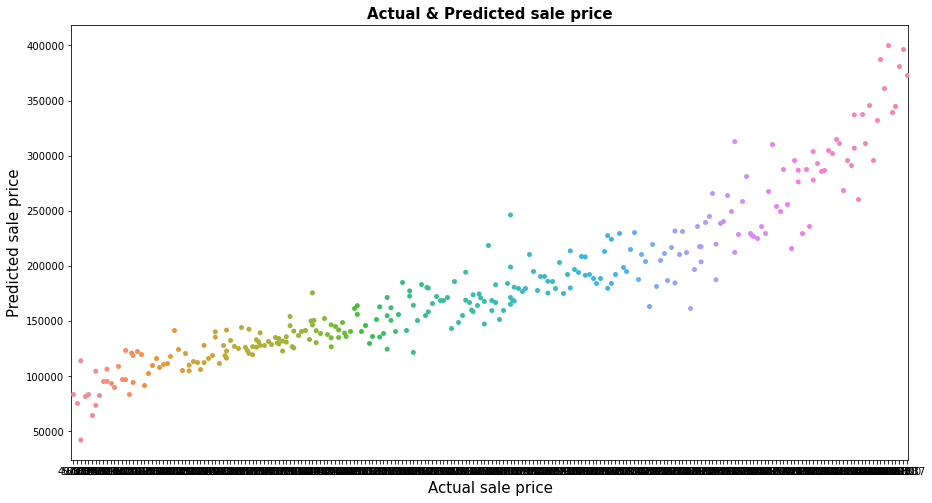

In [170]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(15,8))
sns.swarmplot(y_test.round(2), y_pred)
plt.xlabel("Actual sale price", fontsize= 15)
plt.ylabel("Predicted sale price",fontsize= 15)
plt.title("Actual & Predicted sale price" , fontsize= 15, fontweight= 'bold')
plt.show()

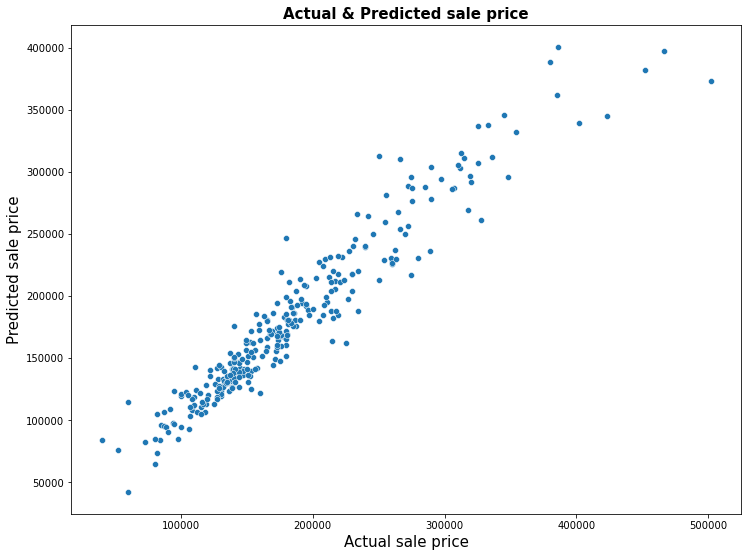

In [171]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(12,9))
sns.scatterplot(y_test.round(2), y_pred)
plt.xlabel("Actual sale price", fontsize= 15)
plt.ylabel("Predicted sale price",fontsize= 15)
plt.title("Actual & Predicted sale price" , fontsize= 15, fontweight= 'bold')
plt.show()

In [172]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.9150140991539188

Final Mean absolute error: 14747.218016219478

Final Mean square error: 469314234.3764244

Final Root mean square error: 21663.661610550153


In [173]:
feature= x.columns
feature

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SaleType',
       'SaleCondition', 'YearBuilt_age', 'YearRemodAdd_age', 'YrSold_age',
       'GarageYrBlt_age'],
      dtype='object')

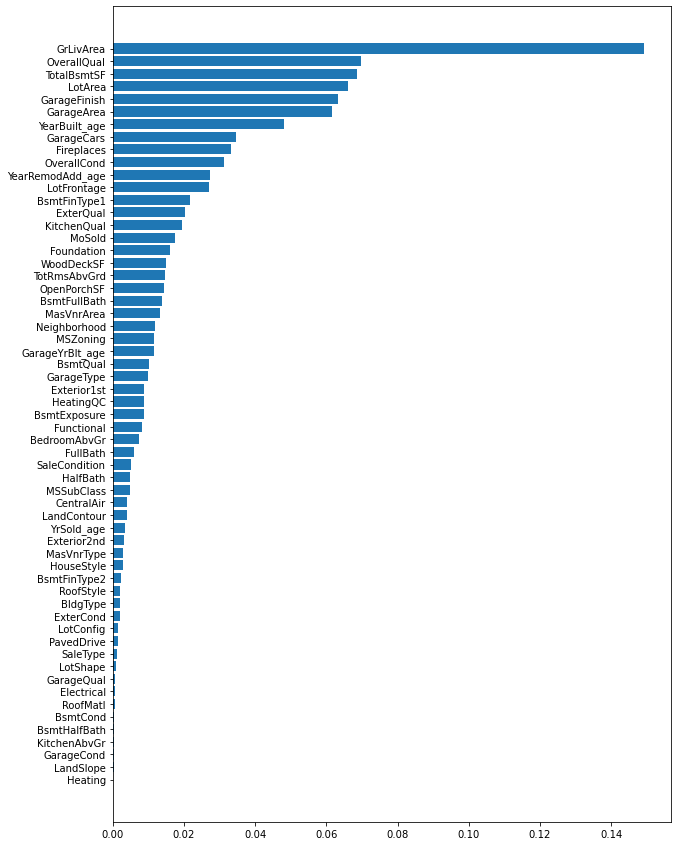

In [174]:
fimp = list(zip(feature,grid_gbdt_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,15))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

Quality is the most important feature for predicting saling price

# saving the model

In [175]:
import pickle
pickle.dump(grid_gbdt_best, open("Housing_Price_Regression_model", "wb"))
load_Housing_Price_Regression_model= pickle.load(open("Housing_Price_Regression_model", "rb"))

In [176]:
y_pred = load_Housing_Price_Regression_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=5)

Predicted Values  Actual Values
130     177617.119720         181500
55      164572.056655         173733
132     205458.737058         216500
176      83444.967445          84000
158     288383.369769         271900

### Predictions of Test Dataset Using Final Model

In [177]:
final_prediction = load_Housing_Price_Regression_model.predict(x_scale_test)
final_prediction

array([320902.76944746, 201257.98158384, 246924.31599463, 163493.38271269,
       210229.15841203,  92644.01039038, 138479.06913677, 291215.54380863,
       216773.0705009 , 162856.12414947,  90047.60240137, 142670.10783874,
       134068.12366369, 180778.95851017, 306785.7783764 , 125231.56754497,
       116465.18540141, 129115.41937889, 158349.56443377, 197518.92109066,
       150362.54296791, 148543.48575421, 137732.41204455,  88744.79586622,
        98896.148901  , 122439.22357692, 172196.71833168, 138273.44306297,
       184278.90483601,  99542.3256598 , 130569.00478162, 184775.44006244,
       227832.85780636, 171336.6243052 , 120139.4577786 , 160033.62305975,
       187126.16856554, 115432.79219487, 145972.73426452, 149696.23817528,
       109697.9612594 , 310403.5036947 , 198804.38560242, 171116.9079588 ,
       137213.54063147, 130654.60449578, 127176.56160003, 103090.94397052,
       204339.96938088, 323833.76525804, 127672.75365182, 194713.85134341,
       102823.96585561, 1

In [178]:
# Predicting the SalePrice from the feature columns of test dataset

Final_test_data_pred = pd.DataFrame()
Final_test_data_pred['Predicted_SalePrice']=final_prediction
Final_test_data_pred.sample(n=5)

Predicted_SalePrice
84         170988.462755
266        111202.597287
19         197518.921091
17         129115.419379
152        189433.463031

In [179]:
Final_test_data = pd.concat([test, Final_test_data_pred], axis=1)
Final_test_data.sample(n=10)

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
237          80         2         96.0    11777         0            3   
233          20         2         65.0     8450         3            3   
179          50         2         85.0    14115         0            3   
222          20         2         61.0    10226         0            3   
273          20         2        150.0   215245         2            2   
101          30         2         52.0     5825         0            3   
22           20         2         65.0    10355         0            3   
59           20         2         98.0    11428         0            3   
291         160         3         21.0     1953         3            3   
68           20         2         57.0     9764         0            3   

     LotConfig  LandSlope  Neighborhood  BldgType  ...  WoodDeckSF  \
237          4          0            18         0  ...         160   
233          4          0            11         0  ...           0   
179          4          0            10         0  ...          40   
222          4          0             4         0  ...         172   
273          4          2            22         0  ...           0   
101          4          0             2         0  ...           0   
22           0          0            11         0  ...           0   
59           4          0            15         0  ...           0   
291          4          0             1         3  ...          72   
68           2          0            18         0  ...           0   

     OpenPorchSF  MoSold  SaleType  SaleCondition  YearBuilt_age  \
237           68       5         5              0             43   
233           85       7         5              2             41   
179           30      10         5              2             16   
222           42       1         5              2              1   
273            0       6         5              2             44   
101            0       6         5              2             83   
22           111       7         5              2             42   
59            44       5         5              2              3   
291            0       6         5              2             36   
68             0       5         5              2             42   

     YearRemodAdd_age  YrSold_age  GarageYrBlt_age  Predicted_SalePrice  
237                44           4             44.0        162467.537568  
233                42           0             42.0        130551.962824  
179                15           1             17.0        148586.594063  
222                 2           1              2.0        282006.342456  
273                45           1             45.0        253199.259789  
101                57           4             57.0        110274.573508  
22                 43           3             43.0        137732.412045  
59                  4           3              4.0        241061.924881  
291                37           4             37.0        111981.658215  
68                  7           2             43.0        143442.558852  

[10 rows x 60 columns]

# Thank you